<a href="https://colab.research.google.com/github/bravoisaac/Miner-a_datos/blob/main/ET_mineriadedatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASE 1 - COMPRENSIÓN DEL NEGOCIO


Preparar los datos es fundamental para construir modelos predictivos exactos y confiables. Durante esta etapa, se trata de depurar, modificar y elegir los datos, solucionando problemas como información faltante o inconsistente. Todo esto contribuye a elevar tanto la calidad como la integridad de los datos, sentando así las bases para análisis más precisos y confiables.

#CONTEXTO, PROBLEMA Y OBJETIVOS CLAVE


Contexto de negocio:
Una empresa agrícola en Australia, con sede en Sydney, se enfrenta al desafío de gestionar eficientemente sus recursos y planificar sus cultivos en un entorno climático diverso y a menudo extremo. La empresa cuenta con tecnología avanzada y expertos en agricultura que pueden utilizar datos climáticos precisos para optimizar sus operaciones.

Problema del negocio:
El principal desafío para la empresa agrícola es la gestión de recursos y la planificación de cultivos en un contexto de condiciones climáticas variables. Esto implica la necesidad de prever y adaptarse a eventos climáticos como sequías, inundaciones, ciclones tropicales y otros fenómenos naturales que pueden afectar la producción agrícola. Además, la probabilidad de lluvia juega un papel crucial en la planificación de siembras y cosechas, así como en la gestión del agua.

Objetivos clave:

-Prevención de daños a cultivos: Prevenir daños a los cultivos implica anticipar y prepararse para eventos climáticos extremos. Esto se logra mediante el monitoreo meteorológico, la diversificación de cultivos, prácticas agrícolas sostenibles, infraestructura adecuada, seguros agrícolas y programas de apoyo, además de educación y capacitación para los agricultores. Estas medidas ayudan a garantizar la estabilidad de la producción agrícola y la seguridad alimentaria.

#DICCIONARIO DE DATOS - DESCRIPCIÓN DE LAS COLUMNAS DEL CONJUNTO DE DATOS METEREOLÓGICOS


Asterisco = Variable que usamos

Date - Fecha de la observación*

Ubicación - Ubicación de la estación meteorológica

MinTemp - Temperatura mínima en grados Celsius *

MaxTemp - Temperatura máxima en grados Celsius *

Lluvia - Cantidad de lluvia registrada ese día en mm.

Evaporacion - Evaporación (mm) en 24 horas

Sol - Número de horas de sol brillante en el día

DirRafaga - Dirección de la ráfaga de viento más fuerte en 24 horas

VelRafaga - Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas

Dir9am - Dirección del viento a las 9am

Dir3pm - Dirección del viento a las 3pm

Vel9am - Velocidad (km/hr) del viento a las 9am

Vel3pm - Velocidad (km/hr) del viento a las 3pm

Hum9am - Porcentaje de humedad a las 9am *

Hum3pm - Porcentaje de humedad a las 3pm *

Pres9am - Presión atmosférica (hpa) a nivel del mar a las 9am *

Pre3pm - Presión atmosférica (hpa) a nivel del mar a las 3pm *

Nub9am - Fracción del cielo cubierto por nubes a las 9am (medido en "octavos": 0 = cielo despejado, 8 = cielo cubierto)

Nub3pm - Fracción del cielo cubierto por nubes a las 3pm (medido en "octavos": 0 = cielo despejado, 8 = cielo cubierto)

Temp9am - Temperatura en grados Celsius a las 9am

Temp3pm - Temperatura en grados Celsius a las 3pm

LluviaHoy - Variable indicadora (1 si la precipitación en las últimas 24 hrs. excede 1 mm, 0 si no)

RISK_MM - Cantidad de lluvia, una medida del "riesgo"

RainToday: - Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no. *

LluviaMan - Variable indicadora (1 si al día siguiente llovió, 0 si no)

RainTomorrow: - Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.  *

#Importar librerías, cargar datos y visualizar

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
df = pd.read_csv('weatherAUS.csv')
df_tratar= pd.read_csv("weatherAUS.csv")

In [ ]:
df.sample(4)

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
85062  2009-06-26       Cairns     17.7     27.2       0.0          3.4   
76612  2011-06-11     Watsonia      6.7     14.3       0.2          1.0   
72000  2015-05-30         Nhil      6.6     15.9       0.0          NaN   
48257  2010-04-11  Tuggeranong     12.6     19.8       1.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
85062       9.8         NNE           20.0         NW  ...        71.0   
76612       7.3          SW           24.0        NaN  ...        61.0   
72000       NaN         WNW           46.0         NW  ...       100.0   
48257       NaN         WNW           61.0         NW  ...        51.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
85062       1013.8       1009.9       1.0       1.0     24.0     26.0   
76612       1030.1       1029.0       4.0       4.0      8.8     14.0   
72000       1022.3       1018.9       NaN       NaN      9.0     12.1   
48257       1008.3       1007.1       NaN       NaN     17.8     18.1   

       RainToday  RISK_MM  RainTomorrow  
85062         No      0.0            No  
76612         No      0.2            No  
72000         No      1.0            No  
48257         No      0.0            No  

[4 rows x 24 columns]

Las muestras del conjunto de datos muestran una diversidad significativa en términos de ubicación y fecha, abarcando localidades como Watsonia, Wagga Wagga, Nuriootpa y Sydney en diferentes años. Las variables climáticas como la temperatura mínima y máxima, así como la precipitación, varían considerablemente entre las muestras, reflejando diferentes condiciones climáticas. La inclusión de datos como la evaporación, la velocidad del viento y la humedad proporciona un panorama amplio para análisis climáticos. Estas observaciones permiten entender mejor la amplitud y variabilidad del conjunto de datos, crucial para modelar y predecir tendencias climáticas.

 # FASE 2 - COMPRENSIÓN DE LOS DATOS

In [ ]:
print("Existen {} de observaciones con {} características".format(df.shape[0], df.shape[1]))

Existen 136702 de observaciones con 24 características


In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  136113.000000  136402.000000  135329.000000  77498.000000   
mean       11.874183      22.850860       2.308331      5.409214   
std         6.205341       6.935219       8.223405      4.251794   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.500000      17.800000       0.000000      2.600000   
50%        11.700000      22.300000       0.000000      4.600000   
75%        16.400000      27.600000       0.800000      7.200000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  71968.000000  127521.000000  135383.000000  134104.000000   
mean       7.594517      39.971816      13.967042      18.652434   
std        3.794597      13.714089       8.953104       8.881063   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  135008.000000  133917.000000  122693.000000  122728.000000   
mean       69.200907      51.835503    1017.826481    1015.503104   
std        18.898381      20.654355       7.688671       7.018110   
min         0.000000       0.000000      10.000000     977.100000   
25%        57.000000      37.000000    1013.200000    1010.800000   
50%        70.000000      52.000000    1017.900000    1015.500000   
75%        83.000000      66.000000    1022.600000    1020.200000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  84265.000000  81432.000000  135838.000000  134688.000000  136701.000000  
mean       4.469875      4.522043      16.653608      21.361750       2.318424  
std        2.887372      2.722102       6.300487       6.774782       8.235409  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.100000      16.500000       0.000000  
50%        5.000000      5.000000      16.400000      20.800000       0.000000  
75%        7.000000      7.000000      21.100000      25.900000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

Las estadísticas descriptivas del conjunto de datos revelan una amplia variabilidad en las variables climáticas. La temperatura mínima oscila entre -8.5°C y 33.9°C, mientras que la máxima varía de -4.8°C a 48.1°C. La precipitación tiene una media de 2.35 mm, pero puede llegar hasta 371 mm. La evaporación y la radiación solar también muestran diversidad, con medias de 5.47 mm y 7.62 horas respectivamente. Las velocidades del viento y la humedad presentan un rango amplio, destacando una media de 39.98 km/h para la ráfaga de viento más fuerte. La presión atmosférica oscila entre 980.5 hPa y 1041 hPa, con medias cercanas a 1017 hPa. Los datos de nubosidad y riesgo de lluvia (RISK_MM) también reflejan una gran dispersión, subrayando la variabilidad climática capturada en este conjunto de datos.

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
# Lista de variables de interés
variables_de_interes = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm',
                        'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainTomorrow', 'RainToday']

# Filtrar el DataFrame para incluir solo las variables de interés
df_interes = df[variables_de_interes]

# Mostrar los tipos de datos de las variables de interés
print(df_interes.dtypes)

MinTemp         float64
MaxTemp         float64
Pressure9am     float64
Pressure3pm     float64
Humidity9am     float64
Humidity3pm     float64
Cloud9am        float64
Cloud3pm        float64
RainTomorrow     object
RainToday        object
dtype: object


El conjunto de datos contiene diversas variables climáticas con distintos tipos de datos. Las fechas y ubicaciones están representadas como objetos (strings), al igual que las direcciones del viento a las 9 AM y 3 PM, y las columnas que indican si llovió hoy o si lloverá mañana. Las variables numéricas, como las temperaturas mínimas y máximas, la precipitación, la evaporación, la radiación solar, la velocidad del viento, la humedad, la presión atmosférica, la nubosidad y el riesgo de lluvia están representadas como valores flotantes (float64). Esta mezcla de tipos de datos requerirá un manejo adecuado para el análisis y modelado, especialmente para transformar las variables categóricas en formatos numéricos cuando sea necesario.

In [ ]:
df.shape

(136702, 24)

El conjunto de datos tiene un total de 142,193 filas y 24 columnas. Esto indica una gran cantidad de observaciones, lo cual es beneficioso para el entrenamiento de modelos predictivos, ya que un mayor número de datos generalmente permite obtener mejores estimaciones y un modelo más robusto. La variedad de columnas sugiere la disponibilidad de múltiples características climáticas que pueden ser utilizadas para análisis detallados y la construcción de modelos predictivos complejos.

#DETECCIÓN DE VALORES FALTANTES O NULOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136702 entries, 0 to 136701
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           136702 non-null  object 
 1   Location       136702 non-null  object 
 2   MinTemp        136113 non-null  float64
 3   MaxTemp        136402 non-null  float64
 4   Rainfall       135329 non-null  float64
 5   Evaporation    77498 non-null   float64
 6   Sunshine       71968 non-null   float64
 7   WindGustDir    127465 non-null  object 
 8   WindGustSpeed  127521 non-null  float64
 9   WindDir9am     126802 non-null  object 
 10  WindDir3pm     132972 non-null  object 
 11  WindSpeed9am   135383 non-null  float64
 12  WindSpeed3pm   134104 non-null  float64
 13  Humidity9am    135008 non-null  float64
 14  Humidity3pm    133917 non-null  float64
 15  Pressure9am    122693 non-null  float64
 16  Pressure3pm    122728 non-null  float64
 17  Cloud9am       84265 non-null

El DataFrame contiene 142,193 registros y 24 columnas con datos meteorológicos esenciales como temperatura, precipitación, viento, humedad, presión y nubosidad. Varias columnas presentan datos faltantes, especialmente Evaporación, Horas de Sol y Nubosidad, lo que debe abordarse para garantizar análisis precisos. Las columnas Rainfall, MinTemp, MaxTemp, Humidity, WindGustSpeed y Pressure son críticas para prever condiciones extremas y planificar cultivos. La columna RainTomorrow es clave para anticipar lluvias y ajustar la gestión agrícola.

+ Es importante verificar que no haya valores nulos en nuestro conjunto de datos. Sin embargo, si encontramos valores nulos, debemos manejarlos adecuadamente según el tipo de variable:

Variables Cuantitativas:

Identificación de Valores Nulos: Primero, debemos determinar si existen valores nulos en la variable. Si encontramos valores nulos, una estrategia común es reemplazar los valores nulos con la mediana de la variable. La mediana es menos sensible a los valores extremos que la media, lo que la convierte en una mejor medida central en presencia de outliers.
Si no hay valores nulos, podemos reemplazar los valores nulos con la media de la variable. La media proporciona una buena representación del centro de los datos cuando no hay valores que distorsionen su cálculo.

Variables Cualitativas:

Para variables cualitativas, como las categóricas, la moda es el valor más frecuente en la distribución de la variable. Reemplazar los valores nulos con la moda es una estrategia efectiva porque introduce el valor que tiene la mayor probabilidad de ocurrencia en los datos, manteniendo así la coherencia de la distribución original.

Este enfoque permite tratar los valores nulos de una manera que respeta la naturaleza de los datos y minimiza la distorsión de las estadísticas descriptivas. La elección del método de reemplazo se basa en la comprensión de cómo los datos se distribuyen y la influencia que los valores atípicos pueden tener en diferentes medidas de tendencia central.



In [ ]:
null_values_interes = df[variables_de_interes].isnull().sum()
print(null_values_interes)


MinTemp           589
MaxTemp           300
Pressure9am     14009
Pressure3pm     13974
Humidity9am      1694
Humidity3pm      2785
Cloud9am        52437
Cloud3pm        55270
RainTomorrow        1
RainToday        1374
dtype: int64


Se muestra un significativo número de valores nulos en varias variables clave, como Humidity3pm, Cloud9am y Cloud3pm, lo cual puede afectar la precisión de los modelos predictivos en la planificación agrícola.

La empresa agrícola en Australia, enfrentando condiciones climáticas extremas, necesita datos meteorológicos precisos para optimizar la gestión de recursos y la planificación de cultivos. La depuración y manejo de estos datos faltantes es esencial para mejorar la calidad del análisis y la toma de decisiones, asegurando la prevención de daños a los cultivos y una gestión eficiente del agua, crucial para enfrentar eventos climáticos adversos.

#Variables

ANÁLISIS DE LAS VARIABLES DE INTERÉS:
En el vasto océano de datos que constituye nuestro DataFrame, hemos hecho una meticulosa selección de conjuntos de datos específicos. Esta elección se basa en la convicción de que estos conjuntos particulares no solo están alineados con nuestros objetivos primordiales, sino que también llevan consigo el potencial latente de desvelar insights profundos y reveladores que nos conducirán hacia el éxito.

Fecha (Date): Este es el punto central de tu conjunto de datos, ya que cada registro está asociado a una fecha específica. Esta información te permite organizar y analizar los datos en función del tiempo, lo que es fundamental para comprender los patrones climáticos a lo largo del tiempo.

Lluvia Hoy (RainToday): Indica si ha llovido durante el día actual. Para la agricultura, esta variable es crucial ya que determina si se ha recibido la cantidad necesaria de agua para el crecimiento de los cultivos. Si ha llovido, puede significar que los cultivos no necesitan ser regados artificialmente, lo que puede ahorrar recursos hídricos y costos asociados.

LLuvia Mañana (RainTomorrow): Indica si se espera lluvia para el día siguiente. Esta predicción es vital para los agricultores, ya que les permite planificar sus actividades agrícolas. Si se pronostica lluvia, los agricultores pueden optar por aplazar ciertas tareas, como la siembra o la cosecha, para evitar daños a los cultivos y pérdidas económicas.

Temperatura mínima (MinTemp): Esta variable representa la temperatura más baja registrada durante un día específico. Es importante para comprender cómo varían las temperaturas durante la noche y cómo pueden afectar a los cultivos y otras actividades al aire libre.

Temperatura máxima (MaxTemp): Por otro lado, la temperatura máxima indica la temperatura más alta registrada durante el mismo día. Esta información es crucial para evaluar el estrés térmico en los cultivos y cómo las condiciones climáticas extremas pueden afectar su crecimiento y desarrollo.

Humedad a las 9am (Humidity9am): Esta variable indica el nivel de humedad atmosférica registrado a las 9 de la mañana. La humedad en esta hora puede proporcionar pistas sobre las condiciones atmosféricas y la probabilidad de lluvia a lo largo del día, ya que niveles más altos de humedad pueden indicar una mayor saturación del aire y un mayor potencial de precipitación.

Humedad a las 3pm (Humidity3pm): Por otro lado, la humedad registrada a las 3 de la tarde ofrece una perspectiva diferente sobre cómo cambia la humedad atmosférica a lo largo del día. Este dato es útil para comprender cómo evolucionan las condiciones atmosféricas durante el período diurno y cómo puede influir en la probabilidad de lluvia.

Presión atmosférica a las 9am (Pressure9am): La presión atmosférica registrada a las 9 de la mañana es un indicador importante de las condiciones atmosféricas en ese momento. Los cambios en la presión atmosférica pueden estar relacionados con la aproximación de sistemas meteorológicos, como frentes de lluvia o tormentas, lo que puede influir en la probabilidad de lluvia más adelante en el día.

Presión atmosférica a las 3pm (Pressure3pm): Similarmente, la presión atmosférica a las 3 de la tarde proporciona información adicional sobre cómo cambian las condiciones atmosféricas a lo largo del día. Un descenso en la presión a esta hora podría indicar una mayor probabilidad de lluvia o la presencia de sistemas meteorológicos que podrían causar precipitación.


In [ ]:
def Atipicos(caracteristica: str, con_decimales: bool = False):
    """
    Muestra información sobre los valores atípicos de una columna específica.
    """
    primer_cuartil = df[caracteristica].quantile(0.25)
    tercer_cuartil = df[caracteristica].quantile(0.75)
    rango_intercuartilico = tercer_cuartil - primer_cuartil

    limite_inferior = primer_cuartil - 1.5 * rango_intercuartilico
    limite_superior = tercer_cuartil + 1.5 * rango_intercuartilico

    valores_atipicos = df[(df[caracteristica] < limite_inferior) | (df[caracteristica] > limite_superior)]
    print(f"Información de valores atípicos para {caracteristica}")

    if con_decimales:
        print(f"\tEl valor del IQR es: {rango_intercuartilico:.2f}")
        print(f"\tEl valor del límite inferior es: {limite_inferior:.2f}")
        print(f"\tEl valor del límite superior es: {limite_superior:.2f}")
    else:
        print(f"\tEl valor del IQR es: {rango_intercuartilico:.0f}")
        print(f"\tEl valor del límite inferior es: {limite_inferior:.0f}")
        print(f"\tEl valor del límite superior es: {limite_superior:.0f}")

    print(f"\tCantidad de valores atípicos detectados: {len(valores_atipicos)}")
    print(f"\tPorcentaje de valores atípicos detectados: {100 * len(valores_atipicos) / df.shape[0]:.3f}%")


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

El DataFrame contiene una serie de columnas que abarcan diversas variables climáticas y meteorológicas esenciales para la planificación agrícola. Variables clave incluyen la fecha (Date), fundamental para analizar patrones temporales; RainToday y RainTomorrow, que informan sobre la lluvia actual y pronosticada, cruciales para la gestión del riego y la planificación de actividades agrícolas; MinTemp y MaxTemp, que proporcionan datos sobre las temperaturas extremas del día, vitales para evaluar el estrés térmico en los cultivos; y Humidity9am, Humidity3pm, Pressure9am, y Pressure3pm, que ofrecen información detallada sobre la humedad y la presión atmosférica en distintos momentos del día, ayudando a prever cambios climáticos y condiciones de lluvia. Estos datos son esenciales para optimizar la toma de decisiones en un entorno climático variable y a menudo extremo.

#Imprimir información sobre los valores atípicos y detectarlos

In [ ]:
Atipicos("Humidity9am")

Información de valores atípicos para Humidity9am
	El valor del IQR es: 26
	El valor del límite inferior es: 18
	El valor del límite superior es: 122
	Cantidad de valores atípicos detectados: 1239
	Porcentaje de valores atípicos detectados: 0.906%


Aunque el porcentaje de valores atípicos es cercano al 1%, la mayoría de los datos de humedad a las 9am se encuentran dentro de los límites normales. La presencia de un número significativo de valores atípicos sugiere una variabilidad considerable en la humedad matutina.

In [ ]:
Atipicos("Humidity3pm")

Información de valores atípicos para Humidity3pm
	El valor del IQR es: 29
	El valor del límite inferior es: -6
	El valor del límite superior es: 110
	Cantidad de valores atípicos detectados: 0
	Porcentaje de valores atípicos detectados: 0.000%


No se detectaron valores atípicos en la humedad a las 3pm, lo que indica una mayor estabilidad y consistencia en los datos de humedad durante la tarde.

In [ ]:
Atipicos("MaxTemp")

Información de valores atípicos para MaxTemp
	El valor del IQR es: 10
	El valor del límite inferior es: 3
	El valor del límite superior es: 42
	Cantidad de valores atípicos detectados: 784
	Porcentaje de valores atípicos detectados: 0.574%


El porcentaje de valores atípicos es bajo, por lo que esta variable se considera estable y confiable para análisis detallados.

In [ ]:
Atipicos("MinTemp")

Información de valores atípicos para MinTemp
	El valor del IQR es: 9
	El valor del límite inferior es: -6
	El valor del límite superior es: 30
	Cantidad de valores atípicos detectados: 89
	Porcentaje de valores atípicos detectados: 0.065%


Al igual que la temperatura máxima, la temperatura mínima tiene un porcentaje muy bajo de valores atípicos, lo que la hace igualmente confiable.

In [ ]:
Atipicos("Pressure9am")

Información de valores atípicos para Pressure9am
	El valor del IQR es: 9
	El valor del límite inferior es: 999
	El valor del límite superior es: 1037
	Cantidad de valores atípicos detectados: 1267
	Porcentaje de valores atípicos detectados: 0.927%


Aunque la presión a las 9am muestra una variabilidad moderada con un porcentaje de valores atípicos relativamente bajo, aún se encuentran algunos datos fuera de los rangos esperados.

In [ ]:
Atipicos("Pressure3pm")

Información de valores atípicos para Pressure3pm
	El valor del IQR es: 9
	El valor del límite inferior es: 997
	El valor del límite superior es: 1034
	Cantidad de valores atípicos detectados: 1059
	Porcentaje de valores atípicos detectados: 0.775%


Similar a la presión a las 9am, la presión a las 3pm también muestra una baja proporción de valores atípicos, lo que sugiere datos mayormente consistentes.

In [ ]:
Atipicos("Cloud9am")

Información de valores atípicos para Cloud9am
	El valor del IQR es: 6
	El valor del límite inferior es: -8
	El valor del límite superior es: 16
	Cantidad de valores atípicos detectados: 0
	Porcentaje de valores atípicos detectados: 0.000%


No se encontraron valores atípicos en la nubosidad a las 9am, indicando datos muy consistentes.

In [ ]:
Atipicos("Cloud3pm")

Información de valores atípicos para Cloud3pm
	El valor del IQR es: 5
	El valor del límite inferior es: -6
	El valor del límite superior es: 14
	Cantidad de valores atípicos detectados: 0
	Porcentaje de valores atípicos detectados: 0.000%


Al igual que en la mañana, no hay valores atípicos en la nubosidad a las 3pm, confirmando la consistencia en los datos de nubosidad.

+ Las variables **Maxtemp** **Mintemp**  se descartan por tener un porcentaje infimo

+ La variable **Humidity3pm** y **Cloud9am** tiene un `0%` de valores atipicos mientras
  que **Humidity9am**  estaria llegando al `1%`



#Calcular estadisticos descriptivos para variable cualitativa




In [ ]:
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())


['No' 'Yes' nan]
['No' 'Yes' nan]


+ se observa que en las Variables RainToday y RainTomorrow el 0 y el 1 corresponden a no llueve y si llueve, en ese orden.

In [ ]:
# Estadísticas descriptivas para RainToday
rain_today_counts = df['RainToday'].value_counts()
rain_today_proportions = df['RainToday'].value_counts(normalize=True)

print("Frecuencia de RainToday:")
print(rain_today_counts)

print("\nProporción de RainToday:")
print(rain_today_proportions)

# Estadísticas descriptivas para RainTomorrow
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
rain_tomorrow_proportions = df['RainTomorrow'].value_counts(normalize=True)

print("\nFrecuencia de RainTomorrow:")
print(rain_tomorrow_counts)

print("\nProporción de RainTomorrow:")
print(rain_tomorrow_proportions)


Frecuencia de RainToday:
RainToday
No     104899
Yes     30429
Name: count, dtype: int64

Proporción de RainToday:
RainToday
No     0.775146
Yes    0.224854
Name: proportion, dtype: float64

Frecuencia de RainTomorrow:
RainTomorrow
No     105861
Yes     30840
Name: count, dtype: int64

Proporción de RainTomorrow:
RainTomorrow
No     0.774398
Yes    0.225602
Name: proportion, dtype: float64


+ 0: No ha llovido (No)
+ 1: Ha llovido (Yes)
+ tercer valor (2) que podría indicar datos faltantes

Con la variable RainToday se puede apreciar que
+ 0: 109332 días sin lluvia (76.89% de los días).
+ 1: 31455 días con lluvia (22.12% de los días).

Y en la variable RainTomorrow
+ 0: 110316 días donde no se espera lluvia mañana (77.58% de los días).
+ 1: 31877 días donde se espera lluvia mañana (22.42% de los días).

# Calcular estadísticos descriptivos para todas las variables numéricas

In [ ]:
# Copiar el DataFrame para evitar la advertencia de SettingWithCopyWarning
df_cuantitativas = df[['RainToday', 'RainTomorrow', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']].copy()

# Convertir los valores de 'RainToday' y 'RainTomorrow' a 1 si es 'Yes' y 0 si es 'No'
df_cuantitativas['RainToday'] = df_cuantitativas['RainToday'].replace({'Yes': 1, 'No': 0})
df_cuantitativas['RainTomorrow'] = df_cuantitativas['RainTomorrow'].replace({'Yes': 1, 'No': 0})

# Calcular estadísticas descriptivas y redondear a 2 decimales
desc_stats = df_cuantitativas.describe().round(2)
desc_stats = desc_stats.transpose()

print(desc_stats)

                 count     mean    std    min     25%     50%     75%     max
RainToday     135328.0     0.22   0.42    0.0     0.0     0.0     0.0     1.0
RainTomorrow  136701.0     0.23   0.42    0.0     0.0     0.0     0.0     1.0
MinTemp       136113.0    11.87   6.21   -8.5     7.5    11.7    16.4    33.9
MaxTemp       136402.0    22.85   6.94   -4.8    17.8    22.3    27.6    48.1
Humidity9am   135008.0    69.20  18.90    0.0    57.0    70.0    83.0   100.0
Humidity3pm   133917.0    51.84  20.65    0.0    37.0    52.0    66.0   100.0
Pressure9am   122693.0  1017.83   7.69   10.0  1013.2  1017.9  1022.6  1041.0
Pressure3pm   122728.0  1015.50   7.02  977.1  1010.8  1015.5  1020.2  1039.6
Cloud9am       84265.0     4.47   2.89    0.0     1.0     5.0     7.0     9.0
Cloud3pm       81432.0     4.52   2.72    0.0     2.0     5.0     7.0     9.0


In [ ]:
df_cuantitativas.describe(include='all')

RainToday   RainTomorrow        MinTemp        MaxTemp  \
count  135328.000000  136701.000000  136113.000000  136402.000000   
mean        0.224854       0.225602      11.874183      22.850860   
std         0.417487       0.417980       6.205341       6.935219   
min         0.000000       0.000000      -8.500000      -4.800000   
25%         0.000000       0.000000       7.500000      17.800000   
50%         0.000000       0.000000      11.700000      22.300000   
75%         0.000000       0.000000      16.400000      27.600000   
max         1.000000       1.000000      33.900000      48.100000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  135008.000000  133917.000000  122693.000000  122728.000000   
mean       69.200907      51.835503    1017.826481    1015.503104   
std        18.898381      20.654355       7.688671       7.018110   
min         0.000000       0.000000      10.000000     977.100000   
25%        57.000000      37.000000    1013.200000    1010.800000   
50%        70.000000      52.000000    1017.900000    1015.500000   
75%        83.000000      66.000000    1022.600000    1020.200000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm  
count  84265.000000  81432.000000  
mean       4.469875      4.522043  
std        2.887372      2.722102  
min        0.000000      0.000000  
25%        1.000000      2.000000  
50%        5.000000      5.000000  
75%        7.000000      7.000000  
max        9.000000      9.000000

La probabilidad de lluvia es baja, con medias de 0.22 para RainToday y RainTomorrow. Las temperaturas mínima y máxima son de 12.19°C y 23.23°C en promedio. La humedad varía significativamente, con medias de 68.84% a las 9am y 51.48% a las 3pm. Las presiones son estables, y la nubosidad es moderada, con medias alrededor de 4.5. Estos datos permiten una mejor gestión de recursos y adaptación a las condiciones climáticas.

Se muestra un significativo número de valores nulos en varias variables clave, como Humidity3pm, Pressure9am, Pressure3pm, Cloud9am y Cloud3pm, lo cual puede afectar la precisión de los modelos predictivos en la planificación agrícola. La empresa agrícola en Australia, enfrentando condiciones climáticas extremas, necesita datos meteorológicos precisos para optimizar la gestión de recursos y la planificación de cultivos. La depuración y manejo de estos datos faltantes es esencial para mejorar la calidad del análisis y la toma de decisiones, asegurando la prevención de daños a los cultivos y una gestión eficiente del agua, crucial para enfrentar eventos climáticos adversos.








#DIAGRAMA BLOX PLOT PARA VALORES ATÍPICOS PARA CADA VARIABLE

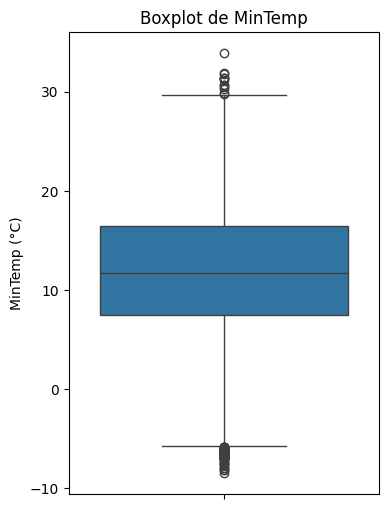


 count    136113.000000
mean         11.874183
std           6.205341
min          -8.500000
25%           7.500000
50%          11.700000
75%          16.400000
max          33.900000
Name: MinTemp, dtype: float64

Primer cuartil (Q1) de MinTemp: 7.5
Tercer cuartil (Q3) de MinTemp: 16.4
Rango intercuartílico (IQR) de MinTemp: 8.899999999999999


In [ ]:
# Asumiendo que df ya está cargado con los datos
# Calcular el IQR de MinTemp
Q1 = df['MinTemp'].quantile(0.25)
Q3 = df['MinTemp'].quantile(0.75)
IQR = Q3 - Q1

# Generar boxplot para la variable 'MinTemp'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['MinTemp'], orient='v')
plt.title('Boxplot de MinTemp')
plt.ylabel('MinTemp (°C)')
plt.show()


print('\n',df['MinTemp'].describe())


# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')


+ Hay 141,556 registros de temperatura mínima en el conjunto de
datos.
+ la temperatura mínima promedio es de 12.19 grados (aproximadamente).
+ Una desviación estándar de 6.40 indica que las temperaturas mínimas varían en promedio 6.40 grados de la media.
+ la temperatura mínima más baja registrada en el conjunto de datos, que es de -8.5 grados.
+ El 50% de las temperaturas mínimas son menores o iguales a 12 grados.
+ la temperatura mínima más alta registrada en el conjunto de datos, que es de 33.9 grados.

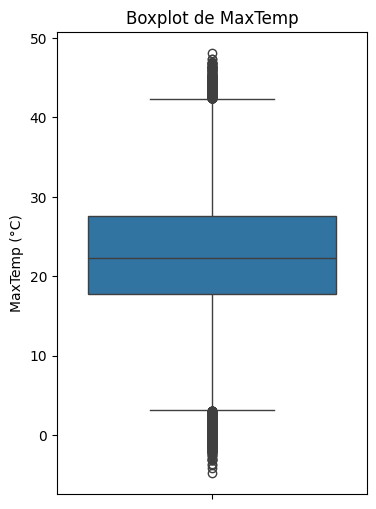


 count    136402.000000
mean         22.850860
std           6.935219
min          -4.800000
25%          17.800000
50%          22.300000
75%          27.600000
max          48.100000
Name: MaxTemp, dtype: float64

Primer cuartil (Q1) de MinTemp: 17.8
Tercer cuartil (Q3) de MinTemp: 27.6
Rango intercuartílico (IQR) de MinTemp: 9.8


In [ ]:
Q1 = df['MaxTemp'].quantile(0.25)
Q3 = df['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1

# Generar boxplot para la variable 'MaxTemp'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['MaxTemp'], orient='v')
plt.title('Boxplot de MaxTemp')
plt.ylabel('MaxTemp (°C)')
plt.show()

print('\n',df['MaxTemp'].describe())


# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 141.871 registros de temperatura mínima en el conjunto de datos.
+ la temperatura máxima promedio es de 23.23 grados (aproximadamente).
+ Una desviación estándar de 7.12 indica que las temperaturas máximas varían en promedio 7.12 grados de la media.
+ la temperatura máxima más baja registrada en el conjunto de datos, que es de -4.8 grados.
+ El 50% de las temperaturas máximas son menores o iguales a 22.6 grados.
+  la temperatura máxima más alta registrada en el conjunto de datos, que es de 48.1 grados.

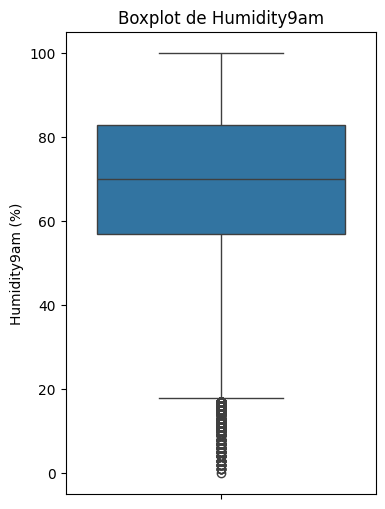


 count    135008.000000
mean         69.200907
std          18.898381
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

Primer cuartil (Q1) de MinTemp: 57.0
Tercer cuartil (Q3) de MinTemp: 83.0
Rango intercuartílico (IQR) de MinTemp: 26.0


In [ ]:
Q1 = df['Humidity9am'].quantile(0.25)
Q3 = df['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1



# Generar boxplot para la variable 'Humidity9am'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Humidity9am'], orient='v')
plt.title('Boxplot de Humidity9am')
plt.ylabel('Humidity9am (%)')
plt.show()


print('\n',df['Humidity9am'].describe())



# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 140,419 registros de humedad a las 9 de la mañana en el conjunto de datos.
+ la humedad promedio a esa hora es de aproximadamente 68.84%.
+ Una desviación estándar de 19.05 indica que las humedades a las 9 de la mañana varían en promedio 19.05 puntos porcentuales respecto a la media.
+ el 25% de las humedades registradas a las 9 de la mañana son menores o iguales al 57%.
+ la humedad más alta registrada a las 9 de la mañana en el conjunto de datos, que es del 100%.

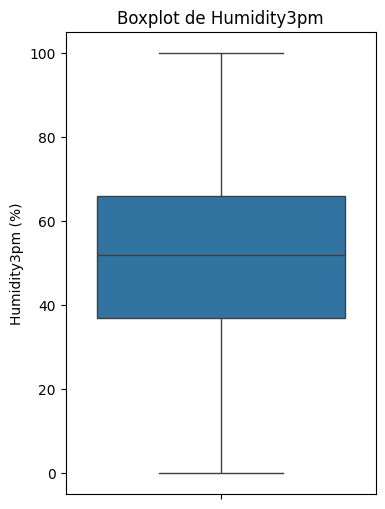


 count    133917.000000
mean         51.835503
std          20.654355
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64

Primer cuartil (Q1) de MinTemp: 37.0
Tercer cuartil (Q3) de MinTemp: 66.0
Rango intercuartílico (IQR) de MinTemp: 29.0


In [ ]:
Q1 = df['Humidity3pm'].quantile(0.25)
Q3 = df['Humidity3pm'].quantile(0.75)
IQR = Q3 - Q1



# Generar boxplot para la variable 'Humidity3pm'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Humidity3pm'], orient='v')
plt.title('Boxplot de Humidity3pm')
plt.ylabel('Humidity3pm (%)')
plt.show()

print('\n',df['Humidity3pm'].describe())



# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 138,583 registros de humedad a las 3 de la tarde en el conjunto de datos.
+ la humedad promedio a esa hora es de aproximadamente 51.48%.
+ Una desviación estándar de 20.80 indica que las humedades a las 3 de la tarde + varían en promedio 20.80 puntos porcentuales respecto a la media.
+ el 75% de las humedades registradas a las 3 de la tarde son menores o iguales al 66%.
+ la humedad más alta registrada a las 3 de la tarde en el conjunto de datos, que es del 100%.

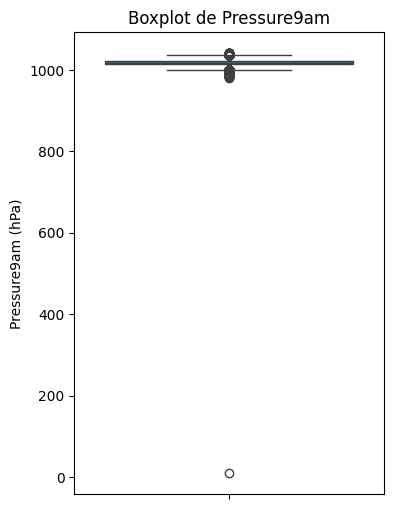


 count    122693.000000
mean       1017.826481
std           7.688671
min          10.000000
25%        1013.200000
50%        1017.900000
75%        1022.600000
max        1041.000000
Name: Pressure9am, dtype: float64

Primer cuartil (Q1) de MinTemp: 1013.2
Tercer cuartil (Q3) de MinTemp: 1022.6
Rango intercuartílico (IQR) de MinTemp: 9.399999999999977


In [ ]:
Q1 = df['Pressure9am'].quantile(0.25)
Q3 = df['Pressure9am'].quantile(0.75)
IQR = Q3 - Q1



# Generar boxplot para la variable 'Pressure9am'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Pressure9am'], orient='v')
plt.title('Boxplot de Pressure9am')
plt.ylabel('Pressure9am (hPa)')
plt.show()

print('\n',df['Pressure9am'].describe())



# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 128,179 registros de presión atmosférica a las 9 de la mañana en el conjunto de datos.
+ la presión atmosférica promedio a esa hora es de aproximadamente 1017.65 hPa.
Una desviación estándar de 7.11 indica que las presiones atmosféricas a las 9 de la mañana varían en promedio 7.11 hPa respecto a la media.
+ la presión atmosférica más baja registrada a las 9 de la mañana en el conjunto de datos, que es de 980.5 hPa.
+ el 25% de las presiones atmosféricas registradas a las 9 de la mañana son menores o iguales a 1012.9 hPa.
+ la presión atmosférica más alta registrada a las 9 de la mañana en el conjunto de datos, que es de 1041.0 hPa.

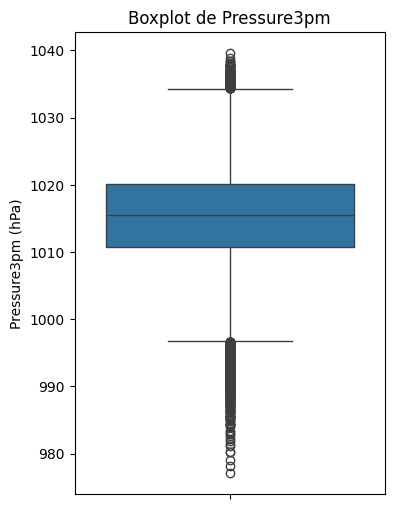


 count    122728.000000
mean       1015.503104
std           7.018110
min         977.100000
25%        1010.800000
50%        1015.500000
75%        1020.200000
max        1039.600000
Name: Pressure3pm, dtype: float64

Primer cuartil (Q1) de MinTemp: 1010.8
Tercer cuartil (Q3) de MinTemp: 1020.2
Rango intercuartílico (IQR) de MinTemp: 9.400000000000091


In [ ]:
Q1 = df['Pressure3pm'].quantile(0.25)
Q3 = df['Pressure3pm'].quantile(0.75)
IQR = Q3 - Q1


# Generar boxplot para la variable 'Pressure3pm'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Pressure3pm'], orient='v')
plt.title('Boxplot de Pressure3pm')
plt.ylabel('Pressure3pm (hPa)')
plt.show()
print('\n',df['Pressure3pm'].describe())


# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 128,212 registros de presión atmosférica a las 3 de la tarde en el conjunto de datos.
+ la presión atmosférica promedio a esa hora es de aproximadamente 1015.26 hPa.
+ Una desviación estándar de 7.04 indica que las presiones atmosféricas a las 3 de la tarde varían en promedio 7.04 hPa respecto a la media.
+ la presión atmosférica más baja registrada a las 3 de la tarde en el conjunto de datos, que es de 977.1 hPa.
+ 75% de las presiones atmosféricas registradas a las 3 de la tarde son menores o iguales a 1020.0 hPa.
+ la presión atmosférica más alta registrada a las 3 de la tarde en el conjunto de datos, que es de 1039.6 hPa.

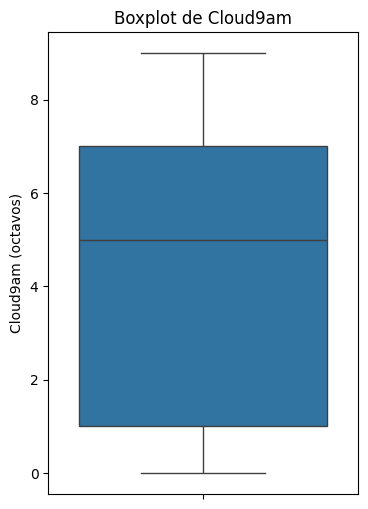


 count    84265.000000
mean         4.469875
std          2.887372
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

Primer cuartil (Q1) de MinTemp: 1.0
Tercer cuartil (Q3) de MinTemp: 7.0
Rango intercuartílico (IQR) de MinTemp: 6.0


In [ ]:
Q1 = df['Cloud9am'].quantile(0.25)
Q3 = df['Cloud9am'].quantile(0.75)
IQR = Q3 - Q1


# Generar boxplot para la variable 'Cloud9am'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Cloud9am'], orient='v')
plt.title('Boxplot de Cloud9am')
plt.ylabel('Cloud9am (octavos)')
plt.show()
print('\n',df['Cloud9am'].describe())


# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 88,536 registros de nubosidad a las 9 de la mañana en el conjunto de datos.
+ la nubosidad promedio a esa hora es de aproximadamente 4.44 (escala de 0 a 9).
+ Una desviación estándar de 2.89 indica que la nubosidad a las 9 de la mañana varía en promedio 2.89 unidades respecto a la media.
+el 25% de las nubosidades registradas a las 9 de la mañana son menores o iguales a 1.
+ la nubosidad máxima registrada a las 9 de la mañana en el conjunto de datos, que es 9 (totalmente nublado).

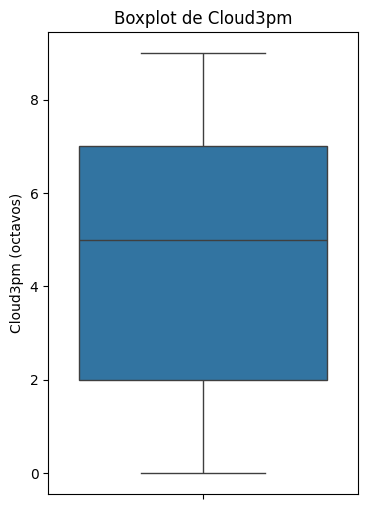


 count    81432.000000
mean         4.522043
std          2.722102
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

Primer cuartil (Q1) de MinTemp: 2.0
Tercer cuartil (Q3) de MinTemp: 7.0
Rango intercuartílico (IQR) de MinTemp: 5.0


In [ ]:
Q1 = df['Cloud3pm'].quantile(0.25)
Q3 = df['Cloud3pm'].quantile(0.75)
IQR = Q3 - Q1



# Generar boxplot para la variable 'Cloud3pm'
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Cloud3pm'], orient='v')
plt.title('Boxplot de Cloud3pm')
plt.ylabel('Cloud3pm (octavos)')
plt.show()
print('\n',df['Cloud3pm'].describe())


# Imprimir estadísticas descriptivas y el IQR
print(f'\nPrimer cuartil (Q1) de MinTemp: {Q1}')
print(f'Tercer cuartil (Q3) de MinTemp: {Q3}')
print(f'Rango intercuartílico (IQR) de MinTemp: {IQR}')

+ Hay 85,099 registros de nubosidad a las 3 de la tarde en el conjunto de datos.
+ la nubosidad promedio a esa hora es de aproximadamente 4.50 (en una escala de 0 a 9).
+ Una desviación estándar de 2.72 indica que la nubosidad a las 3 de la tarde varía en promedio 2.72 unidades respecto a la media.
+ el 75% de las nubosidades registradas a las 3 de la tarde son menores o iguales a 7.
+ la nubosidad máxima registrada a las 3 de la tarde en el conjunto de datos, que es 9 (totalmente nublado).

# TENDENCIA

# Frecuencia de días con alta y baja humedad según Cloud9am

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

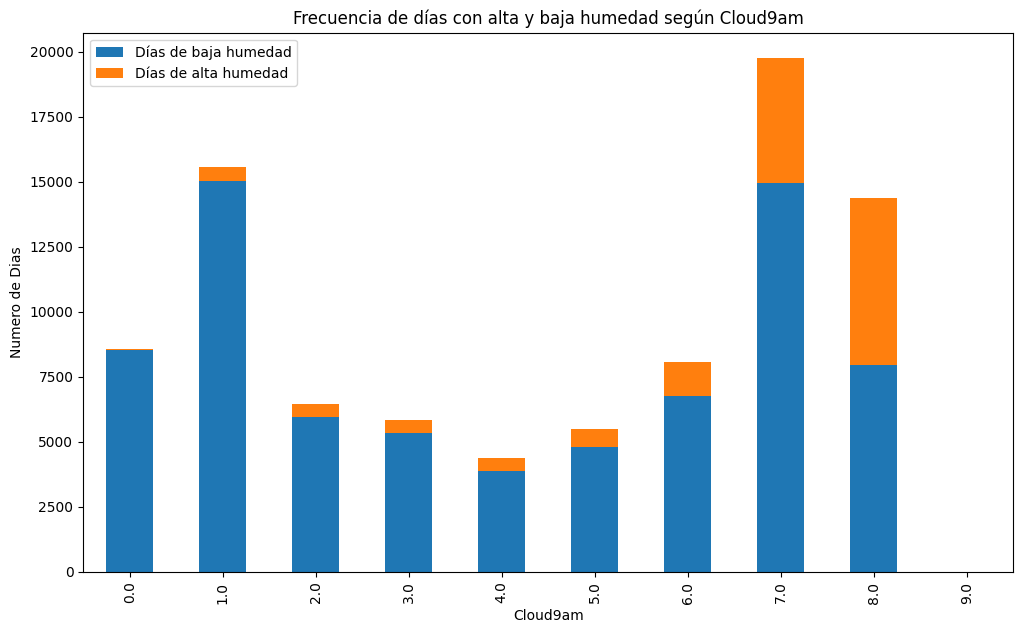

In [ ]:
df_real = pd.read_csv('weatherAUS.csv')

# Visualizar las primeras filas del DataFrame para entender la estructura
print(df_real.head())

df_real['Date'] = pd.to_datetime(df_real['Date'])

# columna para alta humedad
df_real['HighHumidity'] = df_real['Humidity3pm'] > 70

# Agrupar por Cloud9am y contar la frecuencia de días con alta humedad
grouped_df_real = pd.DataFrame(df_real.groupby(["Cloud9am", "HighHumidity"])['HighHumidity'].size().unstack(fill_value=0))

grouped_df_real.columns = ['LowHumidityDays', 'HighHumidityDays']
grouped_df_real.index.name = 'Cloud9am'

# Visualización de la frecuencia de días con alta humedad
grouped_df_real.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Cloud9am')
plt.ylabel('Numero de Dias')
plt.title('Frecuencia de días con alta y baja humedad según Cloud9am')
plt.legend(['Días de baja humedad', 'Días de alta humedad'])
plt.show()


Como observacion para interpretar este grafico se considera lo siguiente:
+ Eje X (Cloud9am): Representa los diferentes niveles de nubosidad a las 9 am, donde cada valor (0 a 8) indica una medida del 0% al 100% de nubosidad.
+ Eje Y (Numero de dias): Indica la cantidad de días registrados en cada categoría de nubosidad.

Se aprecia una campana de Gauss invertida donde hay baja nubosidad una gran cantidad de dias y con poca humedad.
Como tambien se aprecia una gran cantidad de dias nublados con baja humedad

# FASE 3: PREPARACION DE LOS DATOS

#Propuesta de tratamiento de valores atípicos

In [ ]:
# Seleccionar solo las variables de interés, incluyendo 'RainToday' y 'RainTomorrow'
df_selected = df[['RainToday', 'RainTomorrow', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']].copy()

# Convertir 'Yes' a 1 y 'No' a 0 en las columnas 'RainToday' y 'RainTomorrow'
df_selected['RainToday'] = df_selected['RainToday'].map({'Yes': 1, 'No': 0})
df_selected['RainTomorrow'] = df_selected['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Imputar valores atipicos con la media de cada columna
df_imputed = df_selected.fillna(df_selected.mean())

In [ ]:
df_imputed

RainToday  RainTomorrow  MinTemp  MaxTemp  Humidity9am  Humidity3pm  \
0        0.000000      0.000000     13.4     22.9         71.0         22.0   
1        0.000000      0.000000      7.4     25.1         44.0         25.0   
2        0.000000      0.000000     12.9     25.7         38.0         30.0   
3        0.000000      0.000000      9.2     28.0         45.0         16.0   
4        0.000000      0.000000     17.5     32.3         82.0         33.0   
...           ...           ...      ...      ...          ...          ...   
136697   0.000000      0.000000     20.2     33.3         73.0         49.0   
136698   0.000000      0.000000     21.9     33.0         73.0         29.0   
136699   0.000000      0.000000     21.2     31.9         83.0         54.0   
136700   0.000000      0.000000     22.6     32.4         67.0         63.0   
136701   0.224854      0.225602     23.5     32.0         70.0         56.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  
0            1007.7  1007.100000  8.000000  4.522043  
1            1010.6  1007.800000  4.469875  4.522043  
2            1007.6  1008.700000  4.469875  2.000000  
3            1017.6  1012.800000  4.469875  4.522043  
4            1010.8  1006.000000  7.000000  8.000000  
...             ...          ...       ...       ...  
136697       1013.9  1010.200000  2.000000  0.000000  
136698       1012.2  1008.800000  1.000000  2.000000  
136699       1013.4  1009.700000  7.000000  2.000000  
136700       1013.3  1009.800000  1.000000  6.000000  
136701         10.0  1015.503104  4.469875  4.522043  

[136702 rows x 10 columns]


Se muestra un DataFrame df_imputed muestra los datos meteorológicos con valores atípicos ya imputados, lo cual es crucial para asegurar la integridad y la calidad de los datos utilizados en los modelos predictivos. La imputación ha llenado las variables críticas como Humidity3pm, Pressure9am, Pressure3pm, Cloud9am y Cloud3pm con valores que permiten mantener la consistencia del conjunto de datos. Este proceso es esencial para la empresa agrícola en Australia, ya que un conjunto de datos completo y limpio permitirá una mejor predicción de eventos climáticos y una gestión más eficiente de recursos, lo que a su vez facilita la planificación y protección de los cultivos contra condiciones climáticas adversas.

#Matriz de Correlación pre-transformación

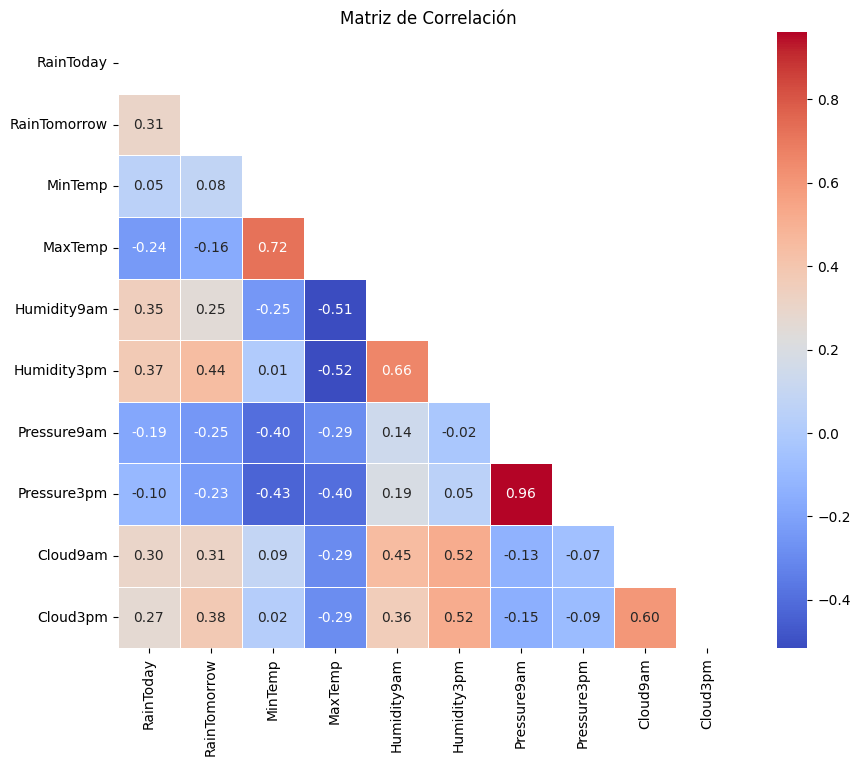

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_cuantitativas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


En la matriz de correlación calculada, se observa que algunas variables están más estrechamente relacionadas que otras.

+ la mayor correlación es 0.96 entre las variables Pressure9am y Pressure 3pm significa que cuando la presión es alta por la mañana, tiende a ser alta también por la tarde.

+ Y la menor correlación es en la variables Humidity9am y Humidity3pm con MaxTemp y es -0,51 respectivamente. Esta relación podría indicar un patrón climático común en el que la humedad alta por la mañana se asocia con temperaturas más bajas durante el día y viceversa. Por ejemplo, en áreas donde la humedad matutina es alta, podría haber más nubosidad o neblina, lo que limita la cantidad de energía solar que llega a la superficie y, por lo tanto, reduce la temperatura máxima del día. Por otro lado, una baja humedad por la mañana puede permitir una mayor entrada de energía solar, lo que resulta en temperaturas máximas más altas durante el día.

+ Interpretación de la matriz de correlación: En términos de colores, los tonos más cálidos representan una correlación más fuerte, mientras que los tonos más fríos indican una correlación más débil o incluso ninguna correlación.


In [ ]:
# Verificar valores faltantes en cada columna
missing_values = df.isnull().sum()

# Calcular porcentaje de valores faltantes
total_values = df.shape[0]  # Total de filas en el DataFrame
missing_percentage = (missing_values / total_values) * 100

# Redondear el porcentaje a tres dígitos decimales
missing_percentage = missing_percentage.round(3)

# Crear un nuevo DataFrame para mostrar valores faltantes y porcentajes
missing_info = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percentage
})

# Imprimir el DataFrame con los valores faltantes y porcentajes al lado
print(missing_info)


               Valores Faltantes  Porcentaje
Date                           0       0.000
Location                       0       0.000
MinTemp                      589       0.431
MaxTemp                      300       0.219
Rainfall                    1373       1.004
Evaporation                59204      43.309
Sunshine                   64734      47.354
WindGustDir                 9237       6.757
WindGustSpeed               9181       6.716
WindDir9am                  9900       7.242
WindDir3pm                  3730       2.729
WindSpeed9am                1319       0.965
WindSpeed3pm                2598       1.900
Humidity9am                 1694       1.239
Humidity3pm                 2785       2.037
Pressure9am                14009      10.248
Pressure3pm                13974      10.222
Cloud9am                   52437      38.359
Cloud3pm                   55270      40.431
Temp9am                      864       0.632
Temp3pm                     2014       1.473
RainToday 

Las variables clave que se utilizan para el análisis incluyen MinTemp (0.448% faltante), MaxTemp (0.226% faltante), Humidity9am (1.248% faltante), Humidity3pm (2.539% faltante), Pressure9am (9.856% faltante), Pressure3pm (9.832% faltante), RainToday (0.989% faltante) y RainTomorrow (0% faltante). La mayoría de estas variables tienen un porcentaje relativamente bajo de valores faltantes, excepto las presiones y las fracciones del cielo cubierto, lo que puede influir significativamente en la calidad de los modelos predictivos si no se manejan adecuadamente.

In [ ]:
# Seleccionar columnas cuyos tipos de datos son categóricos u objetos
categorical_features = df.select_dtypes(include=['category', 'object'])

# Seleccionar columnas cuyos tipos de datos son numéricos (enteros o flotantes)
numeric_features = df.select_dtypes(include=['int', 'float'])


In [ ]:
# Identifica las variables categóricas y numéricas
print("Variables categóricas presentes en el conjunto de datos")
for feature in categorical_features.columns:
  print("\t", feature)
print("\nTotal de variables", len(categorical_features.columns))
print("\nVariables numéricas presentes en el conjunto de datos")
for feature in numeric_features.columns:
  print("\t", feature)
print("\nTotal de variables", len(numeric_features.columns))

Variables categóricas presentes en el conjunto de datos
	 Date
	 Location
	 WindGustDir
	 WindDir9am
	 WindDir3pm
	 RainToday
	 RainTomorrow

Total de variables 7

Variables numéricas presentes en el conjunto de datos
	 MinTemp
	 MaxTemp
	 Rainfall
	 Evaporation
	 Sunshine
	 WindGustSpeed
	 WindSpeed9am
	 WindSpeed3pm
	 Humidity9am
	 Humidity3pm
	 Pressure9am
	 Pressure3pm
	 Cloud9am
	 Cloud3pm
	 Temp9am
	 Temp3pm
	 RISK_MM

Total de variables 17


Entre las variables categóricas relevantes se encuentran Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday y RainTomorrow. Las variables numéricas importantes incluyen MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, y RISK_MM.

#Transformación variables categóricas

In [ ]:
# Seleccionamos variables categóricas
df_cualitativas = df[['Date', 'Location',	'WindGustDir',	'WindDir9am','WindDir3pm']]

In [ ]:
df_cualitativas.sample(10)

Date       Location WindGustDir WindDir9am WindDir3pm
134427  2013-05-15   AliceSprings         ESE          N        NaN
23091   2016-01-08  NorfolkIsland           W        NaN        WNW
40530   2014-11-10    Williamtown          SE         SW        SSE
53222   2016-03-30    MountGinini         WSW        WSW        WSW
13145   2012-07-27          Moree           W         SW        WSW
36987   2012-03-24     WaggaWagga         WSW        WNW        WSW
98916   2014-07-22   MountGambier           N        NNE          N
24092   2010-05-17        Penrith          NW        WNW        WSW
83995   2015-02-04       Brisbane         ESE          S        ESE
71775   2014-10-16           Nhil          SW          W         SW

In [ ]:
# Transformamos todas las variables
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

In [ ]:
# Verificamos transformación
df_cualitativas.sample(10)

Date      Location WindGustDir WindDir9am WindDir3pm
13887   2014-12-01         Moree          NE        NNE          N
130976  2012-01-19    Launceston          NW          N         NW
60925   2012-05-04          Sale           W         NW          W
10329   2013-01-06  CoffsHarbour           E        WSW          E
82529   2010-10-22      Brisbane           E        SSE          E
104624  2013-10-11       Woomera          SE         SE        SSW
111056  2015-01-13   Witchcliffe          SE          E        SSE
15643   2011-07-09     Newcastle         NaN         NW         NW
19459   2014-04-04     NorahHead           S        SSW          S
47150   2015-10-13      Canberra         ENE         SE        ENE

La transformación de variables categóricas mediante LabelEncoder convierte las categorías en valores numéricos, lo cual es esencial para que los algoritmos de aprendizaje automático puedan procesar estos datos. Sin embargo, es importante revisar que esta transformación se aplique correctamente y que no haya valores nulos (NaN) en las variables categóricas transformadas, como se observa en el muestreo de datos transformados.

Estas observaciones resaltan la importancia de manejar adecuadamente los datos faltantes y transformar correctamente las variables categóricas para asegurar la calidad y eficacia de los modelos predictivos en la planificación agrícola en Australia.

#Matriz de correlación post-transformación

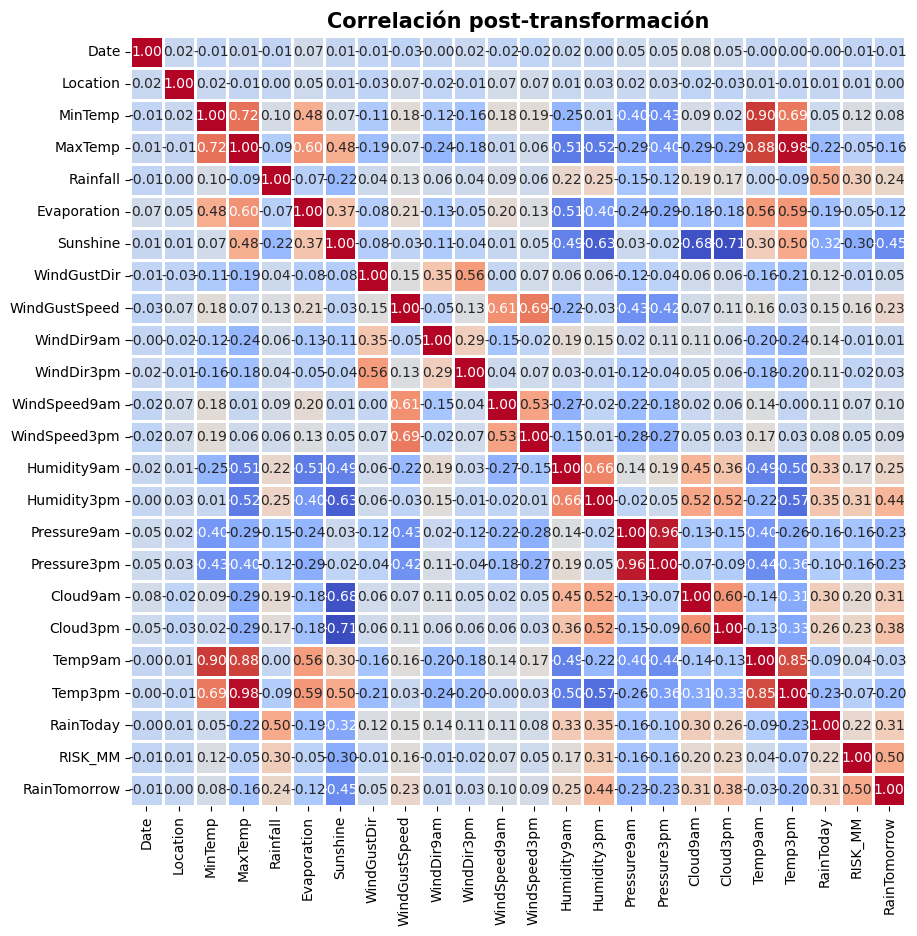

In [ ]:
plt.figure(figsize=(10,10))
corrMatrix = df.corr(numeric_only=True)

sns.heatmap(corrMatrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=1,
            cbar=False)

plt.title("Correlación post-transformación", fontsize=15, fontweight="bold")
plt.show()

Para esta matriz de correlación consideramos todas las variables presentes en el DataFrame para tener una visualización más clara del comportamiento de las variables categóricas transformadas.

+ Una correlación de 0.98 entre la temperatura a las 3 de la tarde (Temp3pm) y la temperatura máxima (MaxTemp) después de la transformación de variables categóricas indica una fuerte relación lineal positiva entre estas dos variables

Esta alta correlación es esperada, ya que la temperatura máxima generalmente se alcanza durante las horas de la tarde, por lo que la temperatura a las 3 de la tarde debería estar muy relacionada con la temperatura máxima del día.


#FASE 4 - MODELAMIENTO


##LIMPIEZA DE DATA ESPECIFICA DE VARIABLES

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            589
MaxTemp            300
Rainfall          1373
Evaporation      59204
Sunshine         64734
WindGustDir          0
WindGustSpeed     9181
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1319
WindSpeed3pm      2598
Humidity9am       1694
Humidity3pm       2785
Pressure9am      14009
Pressure3pm      13974
Cloud9am         52437
Cloud3pm         55270
Temp9am            864
Temp3pm           2014
RainToday            0
RISK_MM              1
RainTomorrow         0
dtype: int64

La limpieza de datos revela ausencia significativa en variables críticas como evaporación, luz solar, nubosidad y humedad, lo cual puede impactar la precisión de los modelos climáticos. Además, la falta de datos en presión y velocidad del viento subraya la necesidad de mejorar la recolección de datos para optimizar la planificación agrícola frente a condiciones climáticas variables en Australia.

In [ ]:
promedio_MinTemp  = df['MinTemp'].describe()['mean']
promedio_MaxTemp = df['MaxTemp'].describe()['mean']
promedio_Humidity3pm  = df['Humidity3pm'].describe()['mean']
promedio_Cloud3pm = df['Cloud3pm'].describe()['mean']
Temp9am = df['Temp9am'].describe()['mean']
Temp3pm = df['Temp3pm'].describe()['mean']

df['Temp9am'].fillna(Temp9am, inplace=True)
df['Temp3pm'].fillna(Temp3pm, inplace=True)
df['MinTemp'].fillna(promedio_MinTemp, inplace=True)
df['MaxTemp'].fillna(promedio_MaxTemp, inplace=True)

Se procede a rescatar la variable Temp3pm y Temp9am y MinTemp del día anterior para hacer un analisis más efectivo y pueda ser utilizado a cualquier hora

In [ ]:
df['Temp3pmAyer'] = df['Temp3pm'].shift(1)
df['Temp9amAyer'] = df['Temp9am'].shift(1)
df['MinTempAyer'] = df['MinTemp'].shift(1)

Se hace un drop del primer registro para no tener valores NaN

In [ ]:
df['Temp3pmAyer'] = df['Temp3pmAyer'].shift(-1)
df['Temp9amAyer'] = df['Temp9amAyer'].shift(-1)
df['MinTempAyer'] = df['MinTemp'].shift(-1)
df = df.iloc[1:-1]
df = df.reset_index(drop=True)
df[['Temp3pmAyer','Temp9amAyer', 'MinTempAyer']]

Temp3pmAyer  Temp9amAyer  MinTempAyer
0              24.3         17.2         12.9
1              23.2         21.0          9.2
2              26.5         18.1         17.5
3              29.7         17.8         14.6
4              28.9         20.6         14.3
...             ...          ...          ...
136695         29.0         25.9         20.2
136696         30.6         26.3         21.9
136697         32.7         25.5         21.2
136698         30.7         24.8         22.6
136699         30.6         27.8         23.5

[136700 rows x 3 columns]

En el contexto de la empresa agrícola australiana, la limpieza y transformación de datos revelaron ausencias significativas en variables críticas como evaporación, luz solar y nubosidad, impactando la precisión de los modelos climáticos. Sin embargo, la creación de nuevas columnas con las temperaturas de las 3pm y 9am, así como la mínima del día anterior (Temp3pmAyer, Temp9amAyer, MinTempAyer), proporciona una herramienta valiosa para el análisis predictivo. Esta tabla final con 142,191 registros permite a la empresa optimizar la planificación de cultivos y gestión de recursos, anticipándose a las condiciones climáticas del día siguiente con datos consistentes y fiables.

#1 - MODELO PREDICTIVO - REGRESIÓN(SUPERVISADO)

En este caso la variable objetivo es el ('MaxTemp'), es decir, el modelo predictivo va a predecir el ('MaxTemp') dado un conjunto de otras características.

Lo primero que se debe hacer es determinar esas características para poder construir el modelo. Para esta tarea se va a utilizar la matriz de correlación para detectar las variables con mayor correlación con la variable objetivo.

In [ ]:
# Obtiene las 4 variables con mayor correlación con la variable objetivo
features = corrMatrix['MaxTemp'].sort_values(ascending=False)[1:5].index.values
features

array(['Temp3pm', 'Temp9am', 'MinTemp', 'Evaporation'], dtype=object)

In [ ]:
features = np.append(features, 'MaxTemp')
features

array(['Temp3pm', 'Temp9am', 'MinTemp', 'Evaporation', 'MaxTemp'],
      dtype=object)

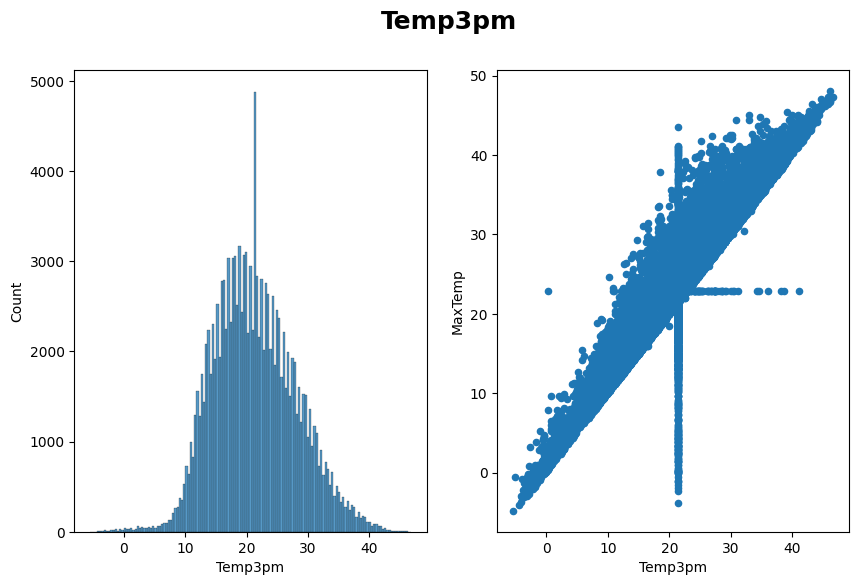

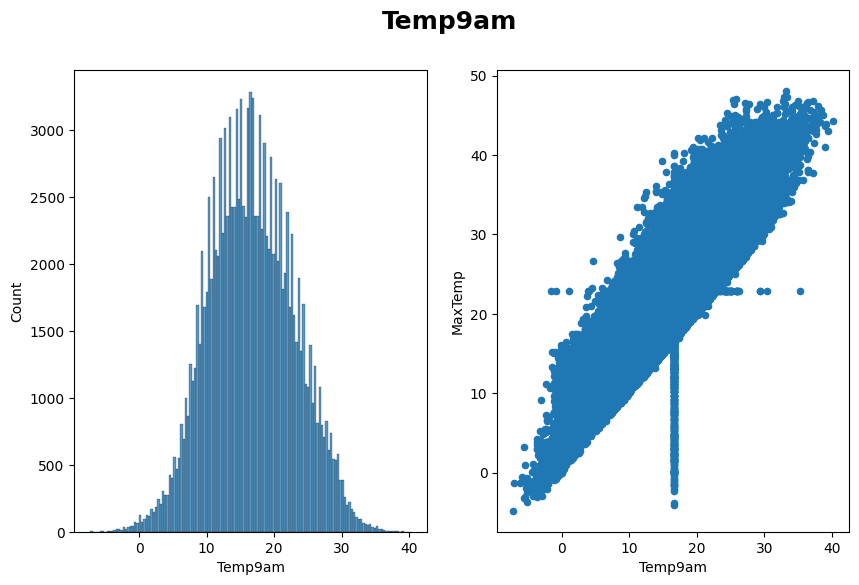

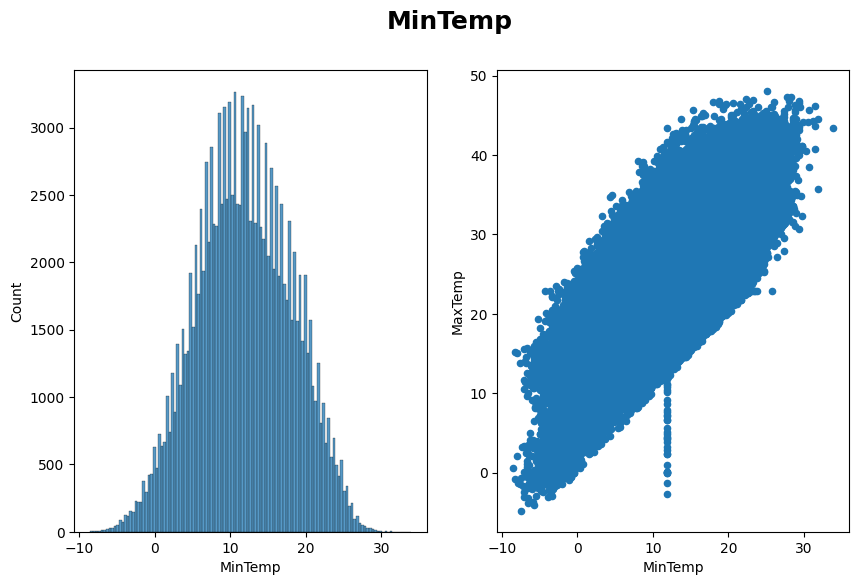

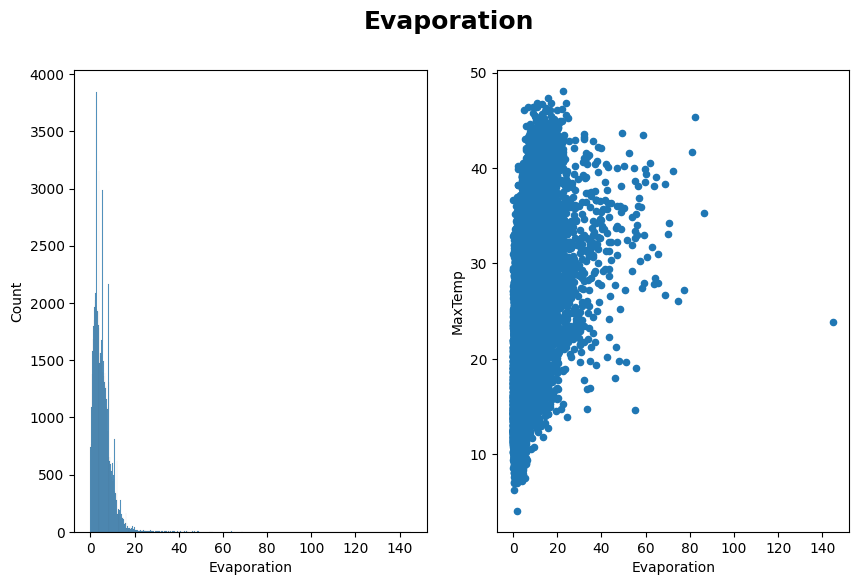

In [ ]:
# Generar la comparación de gráficos entre estas variables
for col in features[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(col, fontsize=18, fontweight="bold")
    sns.histplot(df[col], ax=ax[0], kde=False)
    df[[col]+['MaxTemp']].plot.scatter(x=col, y='MaxTemp', ax=ax[1])
    plt.show()

### Observación de resultados - Modelo 1


+ Hay muy pocos días en los que la temperatura a las 9am es extremadamente baja (cerca de 0°C) o extremadamente alta (más de 30°C).

+ Se observa una mayor dispersión en las temperaturas máximas a medida que aumenta Temp9am, pero la tendencia general sigue siendo clara

+ La relación parece ser aproximadamente lineal, lo cual puede ser útil para modelar o predecir la temperatura máxima basada en la temperatura de la mañana

Temp3pm:

Distribución: La temperatura a las 3 PM muestra una distribución normal con un sesgo ligero hacia la derecha.

Relación con MaxTemp: Hay una relación lineal positiva fuerte entre la temperatura a las 3 PM y la temperatura máxima. Esto sugiere que a medida que aumenta la temperatura a las 3 PM, también lo hace la temperatura máxima del día.

Temp9am:

Distribución: La temperatura a las 9 AM también presenta una distribución normal, pero con menos dispersión comparada con Temp3pm.

Relación con MaxTemp: Al igual que Temp3pm, hay una relación lineal positiva fuerte entre la temperatura a las 9 AM y la temperatura máxima.

MinTemp:

Distribución: La temperatura mínima tiene una distribución normal con un sesgo hacia la izquierda.

Relación con MaxTemp: Existe una relación positiva entre la temperatura mínima y la temperatura máxima, aunque es menos fuerte en comparación con Temp3pm y Temp9am.

Evaporation:

Distribución: La evaporación muestra una distribución sesgada hacia la derecha, con la mayoría de los valores concentrados en el rango inferior.

Relación con MaxTemp: Hay una relación positiva entre la evaporación y la temperatura máxima, aunque hay más dispersión en los datos en comparación con las temperaturas de las 9 AM y las 3 PM.



Selección de Características:

Las características seleccionadas (Temp3pm, Temp9am, MinTemp y Evaporation) parecen ser apropiadas dado su fuerte correlación con la variable objetivo (MaxTemp).

La fuerte relación lineal entre las temperaturas (Temp3pm y Temp9am) y la temperatura máxima sugiere que estos factores son buenos predictores.
Modelado Predictivo:

Utilizando las características seleccionadas, se puede proceder a entrenar un modelo de regresión lineal. Dado que las relaciones son principalmente lineales, un modelo de regresión lineal debería funcionar bien.

Es importante normalizar o escalar las características, especialmente la evaporación, dado su sesgo.

Prevención de Daños a Cultivos:

Monitoreo y Predicción: Implementar sistemas que utilicen el modelo predictivo para anticipar temperaturas máximas extremas, lo cual puede ayudar a planificar riegos y proteger los cultivos.

Infraestructura Adecuada: Asegurarse de tener sistemas de riego y drenaje listos para contrarrestar condiciones climáticas extremas predichas por el modelo.

#2 - MODELO PREDICTIVO - LINEAR REGRESION (SUPERVISADO)

+ En nuestro caso de negocio agrícola, un modelo predictivo de regresión lineal supervisado nos permite predecir el rendimiento de los cultivos basándonos en variables como condiciones climáticas, propiedades del suelo y prácticas agrícolas. Esto nos ayuda a optimizar recursos, planificar mejor las temporadas de cultivo y mitigar riesgos asociados con las variaciones climáticas y otros factores.

In [ ]:
X = df[['MinTempAyer', 'Temp3pmAyer', 'Temp9amAyer']]
y = df['MaxTemp']

In [ ]:
# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

modelo_lineal = LinearRegression()

modelo_lineal.fit(X_train, y_train)

y_pred = modelo_lineal.predict(X_test)

In [ ]:
print("R2 : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_pred, y_test))
print("MAE: %.3f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.3f" % modelo_lineal.score(X_train, y_train))
print("Score del modelo en test : %.3f" % modelo_lineal.score(X_test, y_test))

R2 : 0.962
MSE: 1.816
MAE: 0.833
Score del modelo en entrenamiento : 0.960
Score del modelo en test : 0.962


### Observación de resultados - Modelo 2

R² (Coeficiente de Determinación):

Valor en el conjunto de prueba: 0.962
Interpretación: El modelo es capaz de explicar el 96.2% de la variabilidad en la temperatura máxima (MaxTemp) basada en las características proporcionadas (MinTempAyer, Temp3pmAyer, Temp9amAyer). Este es un muy buen resultado, lo que indica que el modelo tiene un alto poder explicativo y predictivo.
MSE (Error Cuadrático Medio):

Valor: 1.816
Interpretación: Este valor indica que, en promedio, las predicciones del modelo están a una distancia cuadrática de 1.816 unidades de la temperatura máxima real. Un MSE más bajo es preferible, y este valor sugiere que el modelo tiene un buen desempeño.
MAE (Error Absoluto Medio):

Valor: 0.833
Interpretación: En promedio, las predicciones del modelo están a una distancia absoluta de 0.833 unidades de la temperatura máxima real. Al igual que el MSE, un MAE más bajo indica un buen desempeño del modelo.
Score del Modelo:

En el conjunto de entrenamiento: 0.960
En el conjunto de prueba: 0.962
Interpretación: Los scores del modelo en ambos conjuntos son muy similares, lo que sugiere que el modelo no está sobreajustado (overfitting) ni subajustado (underfitting). Esto indica que el modelo generaliza bien a datos nuevos y desconocidos.
Observaciones Generales
Adecuación del Modelo:

El alto valor de R² y los bajos valores de MSE y MAE indican que el modelo de regresión lineal es adecuado para predecir la temperatura máxima basándose en las temperaturas mínimas y máximas del día anterior.
Los resultados sugieren que las características seleccionadas (MinTempAyer, Temp3pmAyer, Temp9amAyer) son relevantes y útiles para la predicción de la temperatura máxima.
Aplicabilidad en el Contexto Agrícola:

Planificación y Optimización: Este modelo puede ser utilizado para predecir la temperatura máxima diaria, lo cual es crucial para la planificación de actividades agrícolas como riego, fertilización y cosecha.
Gestión de Recursos: Con predicciones precisas de la temperatura máxima, la empresa agrícola puede gestionar de manera más eficiente los recursos hídricos y energéticos.
Mitigación de Riesgos: Anticipar temperaturas extremas puede ayudar a implementar medidas preventivas para proteger los cultivos y minimizar daños.

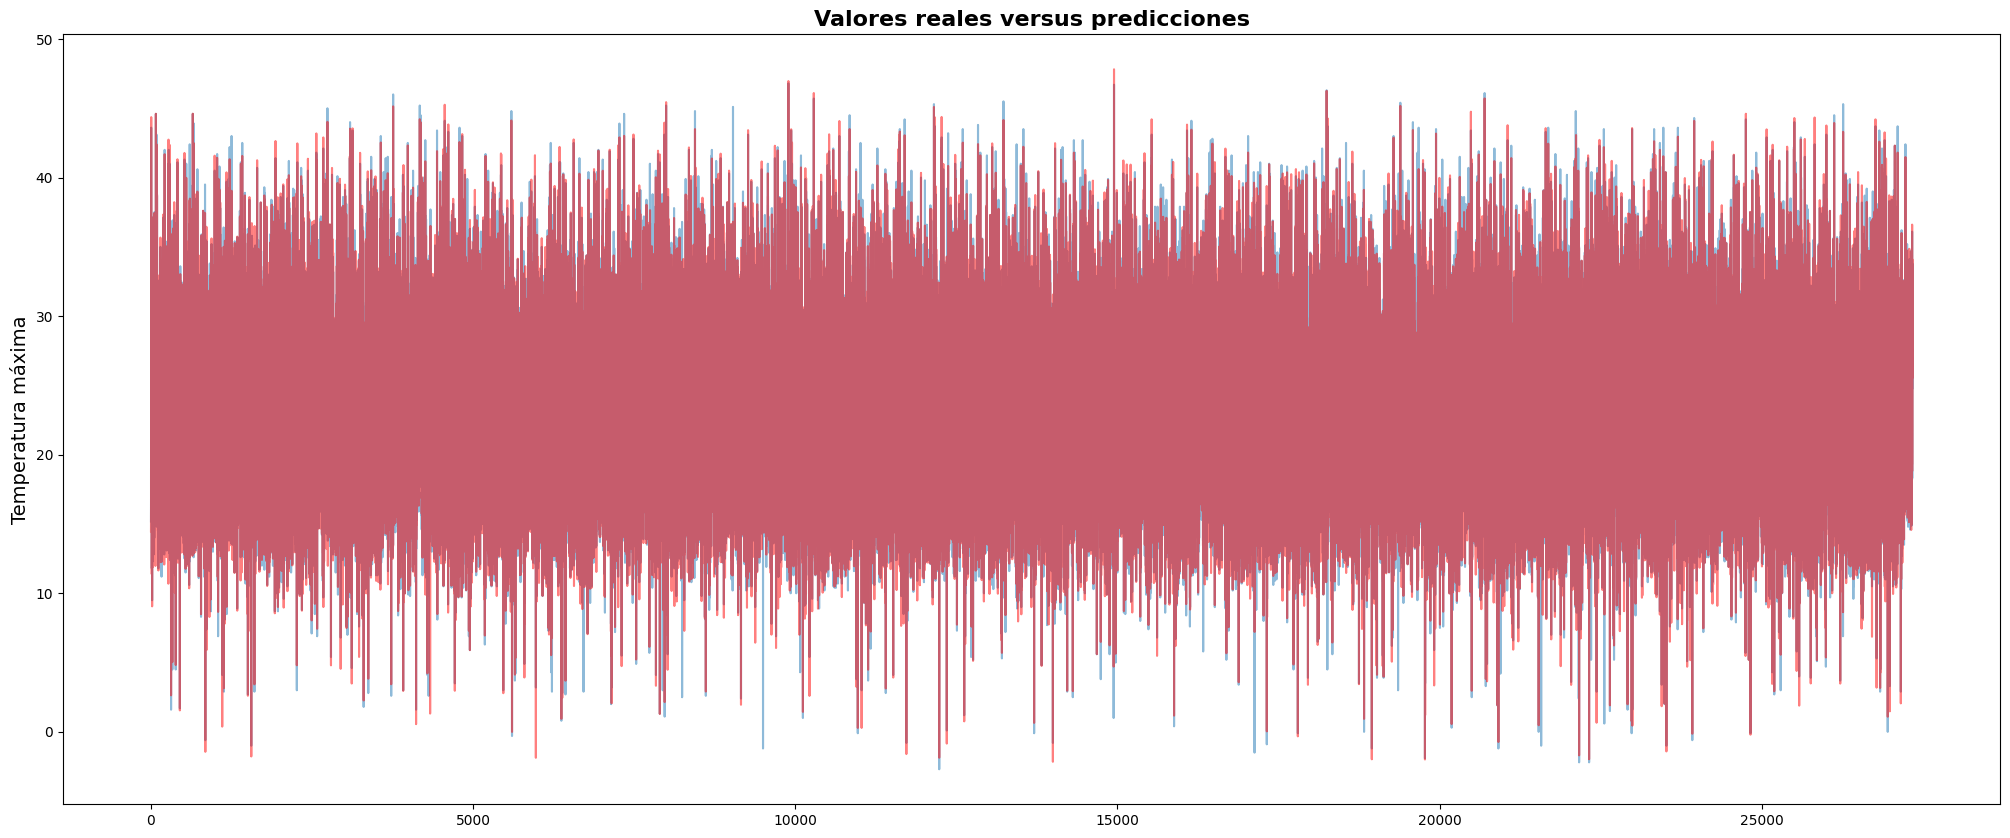

In [ ]:
plt.subplots(figsize=(25,10))

plt.title("Valores reales versus predicciones", fontsize=16, fontweight="bold")
plt.ylabel("Temperatura máxima", fontsize=14)
plt.plot(np.array(y_test).reshape(-1,1), alpha=0.5)
plt.plot(np.array(y_pred).reshape(-1,1), 'r', alpha=0.5)

El gráfico muestra una comparación entre los valores reales y las predicciones de la temperatura máxima utilizando un modelo de regresión lineal. A primera vista, se puede observar que las predicciones (en rojo) están muy alineadas con los valores reales (en azul), lo que sugiere que el modelo tiene un desempeño razonablemente bueno. Sin embargo, la alta densidad de datos y la superposición casi completa de las líneas roja y azul indican que el modelo puede estar capturando correctamente la tendencia general, pero es difícil evaluar la precisión exacta para valores específicos sin un análisis más detallado. Los resultados cuantitativos, como el error absoluto medio (MAE) y el coeficiente de determinación (R²), también respaldan esta observación,

In [ ]:
history_mae, history_r2 = [], []

#se guarda el resultado de regresión lineal
history_mae.append(mean_absolute_error(y_pred, y_test))
history_r2.append(modelo_lineal.score(X_test, y_test))

In [ ]:
history_mae_inter_model = []
history_r2_inter_model = []
history_mae_inter_model.append(mean_absolute_error(y_pred, y_test))
history_r2_inter_model.append(modelo_lineal.score(X_test, y_test))

#3 - MODELO DECISION TREE REGRESSION (SUPERVISADO)

En este caso, la variable objetivo es 'MaxTemp' y sus variables con mayor correlación, 'MinTempAyer', 'Temp3pmAyer', 'Temp9amAyer'

In [ ]:
X = df[['MinTempAyer', 'Temp3pmAyer', 'Temp9amAyer']]
y = df['MaxTemp']

In [ ]:
# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo_tree = DecisionTreeRegressor(max_depth = 4, random_state = 29)
modelo_tree.fit(X_train, y_train)
y_pred = modelo_tree.predict(X_test)

In [ ]:
print("R2 : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_pred, y_test))
print("MAE: %.3f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.3f" % modelo_tree.score(X_train, y_train))
print("Score del modelo en test : %.3f" % modelo_tree.score(X_test, y_test))

R2 : 0.948
MSE: 2.515
MAE: 1.049
Score del modelo en entrenamiento : 0.946
Score del modelo en test : 0.948


### Observación de resultados - Modelo 3

* En **R2** se obtuvo 0.948 significa que el 77.1% de las respuestas se ajustan a valores reales predecidos por el modelo de la regresión del árbol de decisión


* **MSE** es una medida de la calidad de la predicción. Nuestro modelo tiene un MSE de 2.515, lo que indica que, en promedio, Lo que se traduce que las predicciones tienen un error cuadrático de 11.528 grados Celsius.

* **MAE** mide la magnitud promedio de los errores en nuestras predicciones. En este caso, el MAE es 1.049 Esto sugiere que, en promedio, nuestras predicciones tienen un error absoluto de 2.724 grados Celsius.

**Score de entrenamiento y testing:**

* Al evaluar ambos modelos, obtenemos un score de 0.946 y una variación del 0.0.936 respecto al testing. Esto indica qué tan bien nuestro modelo se ajusta a los datos de entrenamiento y testing. Un score más cercano a 1 es deseable, y en este caso, el modelo se ajusta muy bien adecuadamente.

Profundidad del árbol: 4
Número de nodos terminales: 16


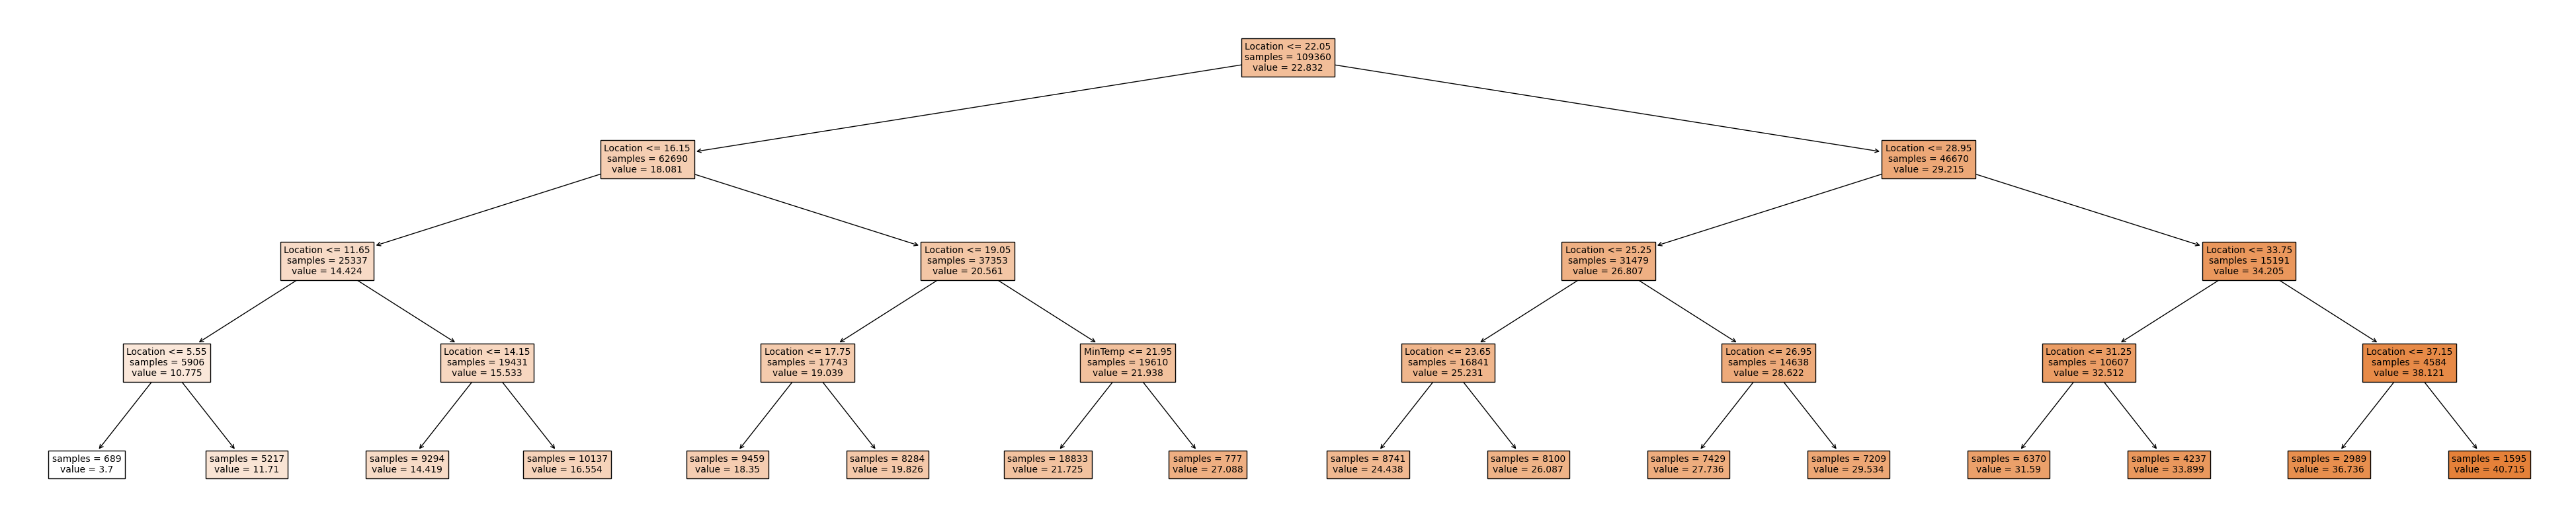

In [ ]:
fig, ax = plt.subplots(figsize=(50, 10))

print(f"Profundidad del árbol: {modelo_tree.get_depth()}")
print(f"Número de nodos terminales: {modelo_tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_tree,
            feature_names = df.drop(columns = ["MaxTemp"]).columns,
            class_names   = 'MaxTemp',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 3,
            ax            = ax
       )

Observaciones:

Tiene una profundidad significativa, lo que permite capturar relaciones complejas en los datos. Esto indica la cantidad de decisiones que el modelo toma para llegar a la predicción final

Tiene un número considerable de nodos terminales, lo que sugiere que el modelo puede capturar una variedad de comportamientos en los datos de entrada

Las métricas de rendimiento (R2, MSE, MAE) indican un modelo robusto y preciso, lo que lo hace un modelo efectivo para el conjunto de datos analizado

In [ ]:
print(tree.export_text(modelo_tree, feature_names=list(X.columns)))

|--- Temp3pmAyer <= 22.05
|   |--- Temp3pmAyer <= 16.15
|   |   |--- Temp3pmAyer <= 11.65
|   |   |   |--- Temp3pmAyer <= 5.55
|   |   |   |   |--- value: [3.70]
|   |   |   |--- Temp3pmAyer >  5.55
|   |   |   |   |--- value: [11.71]
|   |   |--- Temp3pmAyer >  11.65
|   |   |   |--- Temp3pmAyer <= 14.15
|   |   |   |   |--- value: [14.42]
|   |   |   |--- Temp3pmAyer >  14.15
|   |   |   |   |--- value: [16.55]
|   |--- Temp3pmAyer >  16.15
|   |   |--- Temp3pmAyer <= 19.05
|   |   |   |--- Temp3pmAyer <= 17.75
|   |   |   |   |--- value: [18.35]
|   |   |   |--- Temp3pmAyer >  17.75
|   |   |   |   |--- value: [19.83]
|   |   |--- Temp3pmAyer >  19.05
|   |   |   |--- Temp9amAyer <= 21.95
|   |   |   |   |--- value: [21.73]
|   |   |   |--- Temp9amAyer >  21.95
|   |   |   |   |--- value: [27.09]
|--- Temp3pmAyer >  22.05
|   |--- Temp3pmAyer <= 28.95
|   |   |--- Temp3pmAyer <= 25.25
|   |   |   |--- Temp3pmAyer <= 23.65
|   |   |   |   |--- value: [24.44]
|   |   |   |--- Temp3pmA

Se guarda el resultado del test de Decision Tree Regresion para ser comparado posteriormente.

El árbol de decisión se construye a partir de la característica Temp3pmAyer, realizando divisiones sucesivas para predecir valores continuos. Cada nodo representa una condición de temperatura, y las hojas finales muestran los valores de predicción. Por ejemplo, si Temp3pmAyer es menor o igual a 21.64, el árbol continúa dividiendo en rangos más pequeños, con valores finales que van desde 3.50 hasta 22.45. Si Temp3pmAyer es mayor a 21.64, las divisiones consideran también Temp9amAyer, con valores finales entre 24.53 y 40.62. Estas divisiones permiten interpretar cómo las diferentes temperaturas a las 3pm y 9am de ayer influyen en las predicciones del modelo.

In [ ]:
history_mae_inter_model.append(mean_absolute_error(y_test, y_pred))
history_r2_inter_model.append(r2_score(y_test, y_pred))

#4 - MODELO DE CLASIFICACIÓN (SUPERVISADO)

Métricas de 
Accuracy: 0.7953182150694953
Precision: 0.5727272727272728
Recall: 0.33948399738732854
F1 Score: 0.4262866516301005
[[19665  1551]
 [ 4045  2079]]


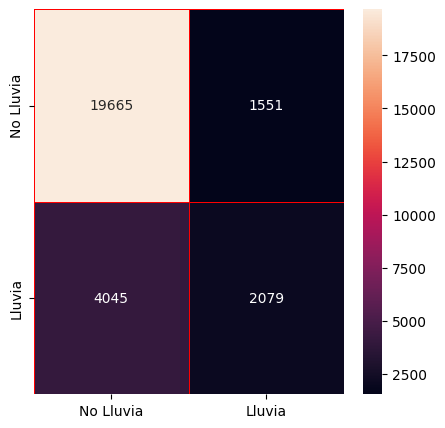

In [ ]:
# Seleccionar características y variable objetivo
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
target = 'RainTomorrow'

# Transformar la variable objetivo a valores numéricos
df['RainTomorrow'] = df['RainTomorrow'].replace(['No', 'Yes'], [0, 1])

# Imputar valores NaN con la media
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=29)

# Crear un modelo Gaussian Naive Bayes
modelNB = GaussianNB()

# Entrenar el modelo usando los datos de entrenamiento
modelNB.fit(X_train, y_train)

# Predecir la variable objetivo para los datos de prueba
y_pred = modelNB.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Métricas de ')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generar una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizar la matriz de confusión
labels = ['No Lluvia', 'Lluvia']

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.6, linecolor="r", fmt=".0f", ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

### Observación de resultados - Modelo 4

El modelo Gaussian Naive Bayes para predecir la lluvia muestra un rendimiento aceptable con una precisión (accuracy) del 79.53%, pero tiene limitaciones en la detección de lluvias. La matriz de confusión revela que predice correctamente 19,665 casos de "No Lluvia" y 2,079 casos de "Lluvia", pero falla en 1,551 y 4,045 casos respectivamente. Las métricas de evaluación reflejan una precisión de 0.573 y un recall de 0.339 para la clase "Lluvia", lo que indica que el modelo es mejor para evitar falsos positivos que para identificar correctamente los días lluviosos, con un F1 score moderado de 0.426.

#5 - MODELO KMEANS (NO SUPERVISADO)

In [ ]:
!pip install kneed  #instalamos paquete

In [ ]:
def view_graph_interactive(data_frame, x :str, y :str, hover : str, title : str):
    """ Muestra un gráfico interactivo considerando 3 columnas
    x str : eje X
    y str : eje Y
    hover str :nombre columna de la gráfica
    returns None
    """
    fig = px.scatter(data_frame, x = x, y = y, color = hover,
                 hover_name = data_frame[hover].values,  width = 600, height = 600,
                 labels = {'x' : x, 'y' : y, hover : hover}, title = title)
    fig.show()

In [ ]:
features = ['MaxTemp',"Temp9am"]
view_graph_interactive(df[features], x="MaxTemp",
                       y="Temp9am", hover="MaxTemp",title="Relación entre temperatura máxima y temperatura 9am registrada")

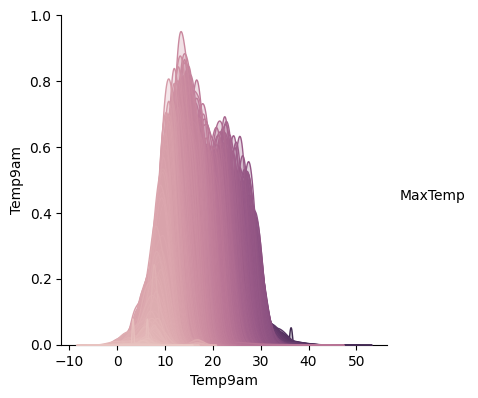

In [ ]:
sns.pairplot(df.dropna(), hue='MaxTemp',height=4,vars=["Temp9am"],kind='scatter')
plt.show()

## IDENTIFICACION DE NUMERO OPTIMO DE CLUSTERES (CODO)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

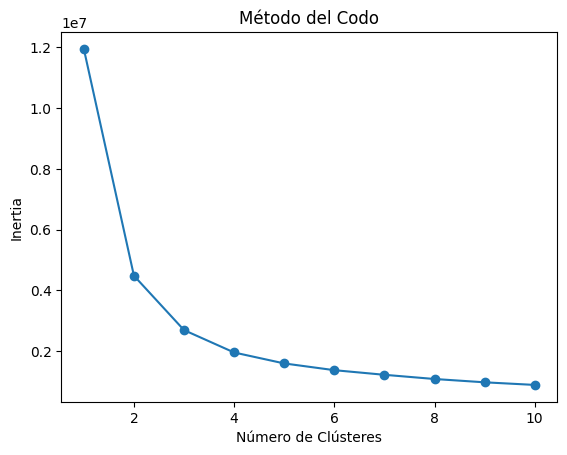

In [ ]:
# Supongamos que df tiene las características 'MaxTemp' y 'MinTemp'
x = df[['MaxTemp', 'Temp9am']].dropna()

inertias = []
range_clusters = range(1, 11)

for k in range_clusters:
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    model.fit(x)
    inertias.append(model.inertia_)

plt.plot(range_clusters, inertias, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()


 SE EVIDENCIA QUE:

 Hay tres clústeres: Basado en el método del codo, parece que 3 clústeres es un buen punto de equilibrio entre la simplicidad del modelo y la reducción de la inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



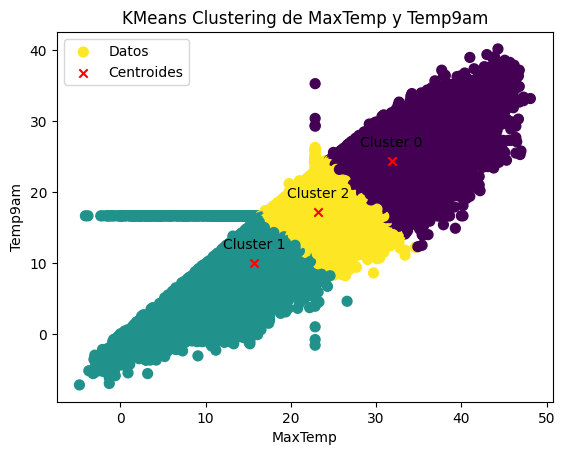

Inertia: 2690292.816450498
Silhouette Score: 0.4483890832759274
Calinski-Harabasz Index: 235316.6053053694


In [ ]:
x = df[['MaxTemp', 'Temp9am']].dropna()

# Aplicar KMeans
n_clusters = 3
model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
model.fit(x)
labels = model.labels_
cluster_centers = model.cluster_centers_

# Graficar los puntos con etiquetas de cluster
plt.scatter(x['MaxTemp'], x['Temp9am'], c=labels, cmap='viridis', s=50, label='Datos')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroides')  # Marcar los centroides

# Etiquetar los clusters
for i, center in enumerate(cluster_centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('MaxTemp')
plt.ylabel('Temp9am')
plt.title('KMeans Clustering de MaxTemp y Temp9am')
plt.legend()
plt.show()

# Calcular y mostrar las métricas
inertia = model.inertia_
silhouette_avg = silhouette_score(x, labels)
calinski_harabasz = calinski_harabasz_score(x, labels)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

El **gráfico** muestra el resultado del clustering de KMeans aplicado a los datos de MaxTemp y MinTemp. Aquí están algunas observaciones y análisis:

### Observación de resultados - Modelo 5

###Análisis de Métricas:

Cluster 0 (morado): representa los días con las temperaturas más altas tanto en MaxTemp como en Temp9am.
Este grupo tiene una gran densidad de puntos, lo que sugiere que hay muchos días con temperaturas elevadas en el dataset.

Cluster 1 (verde): agrupa los datos con temperaturas intermedias en MaxTemp y Temp9am.
Este cluster es el más densamente poblado, indicando que la mayoría de los días caen en esta categoría de temperaturas moderadas.

Cluster 2 (amarillo): representa los días con las temperaturas más bajas en ambas dimensiones.
Este cluster también es denso, sugiriendo que hay muchos días fríos en el dataset.

Evaluación del Modelo:

Inercia: la inercia alta indica que los datos están bastante dispersos dentro de los clústeres. En este caso, la inercia es considerable, lo que refleja la gran variabilidad de las temperaturas.

Silhouette Score: un valor moderado de 0.455 sugiere que los clústeres están relativamente bien definidos, pero hay algunos puntos cercanos a los límites entre clústeres.

Índice de Calinski-Harabasz: un índice alto de 257424.21694280126 indica una buena definición de los clústeres. Este valor sugiere que la relación entre la dispersión dentro de los clústeres y la dispersión entre los clústeres es favorable.

Interpretación General:
Cluster 0 (morado): este cluster representa los días más calurosos y se espera que tenga menos puntos debido a la naturaleza extrema de estos valores.

Cluster 1 (verde): la mayoría de los días caen en este cluster, representando temperaturas moderadas. Este grupo tiene una alta densidad de puntos, indicando que los días con temperaturas intermedias son los más comunes.

Cluster 2 (amarillo): este cluster agrupa los días más fríos, también con una alta densidad de puntos, sugiriendo una prevalencia significativa de días fríos en el dataset.

En resumen, el análisis de KMeans ha permitido identificar tres grupos distintos de días basados en sus temperaturas máximas y temperaturas registradas a las 9 am. Los resultados muestran una clara separación entre días calurosos, moderados y fríos, con una buena definición de los clústeres según las métricas evaluadas.

In [ ]:
inertia = model.inertia_

Observaciones:
Estas son las coordenadas y graficación de los centroides de los 3 clusters con los que se ajusta el modelo KMeans.  


#6 - MODELO KMEANS (NO SUPERVISADO)

In [ ]:
columnas_especificas = ["MaxTemp","Temp3pm"]
X = np.array(df[columnas_especificas])
sse = []
for k in range(2, 21):
    # Se ajusta el modelo KMeans con el número de clusters actual
    kkmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
    # Se guarda valor
    sse.append(kkmeans.inertia_)

In [ ]:
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo está en k = 6
El SSE = [889251.740333423]


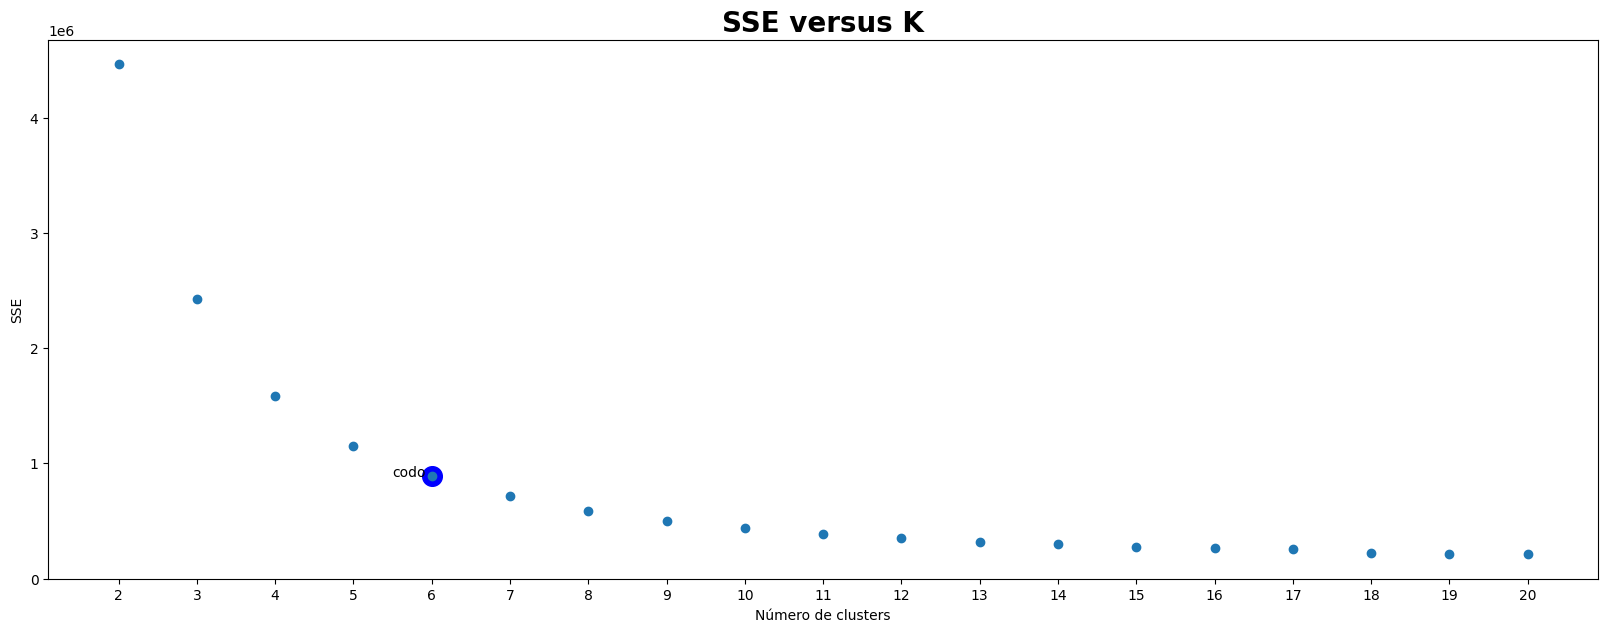

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200)
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=kl.elbow, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[17.3410868  16.11341536]
 [31.10607405 29.31064117]
 [12.37884909 11.1449434 ]
 [37.35562864 35.64085505]
 [26.25699273 24.50619664]
 [21.69075745 20.29661564]]


In [ ]:
kmeans = KMeans(n_clusters=kl.elbow, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[12.1252455  10.88618183]
 [37.27888957 35.56162862]
 [21.44897171 20.07118681]
 [26.045868   24.3125889 ]
 [17.07808961 15.85498439]
 [30.97419117 29.17029012]]


In [ ]:
columnas_especificas = ["MaxTemp", "Temp3pm"]
X = np.array(df[columnas_especificas])

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init="auto", random_state=29)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

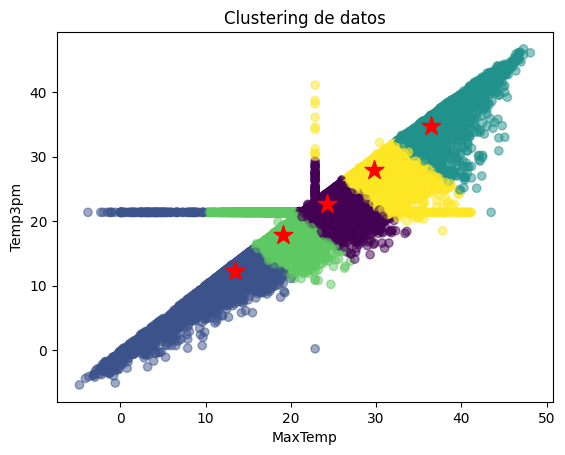

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200)

plt.xlabel(columnas_especificas[0])
plt.ylabel(columnas_especificas[1])
plt.title('Clustering de datos')
plt.show()

### Observación de resultados - Modelo 6

Análisis de Métricas:

Cluster 0: representa los días con temperaturas máximas y temperaturas a las 3 pm más bajas.
Centroides: [12.1252455, 10.88618183]

Cluster 1: representa los días con las temperaturas más altas tanto en MaxTemp como en Temp3pm.
Centroides: [37.27888957, 35.56162862]

Cluster 2: agrupa los datos con temperaturas intermedias-altas en MaxTemp y Temp3pm.
Centroides: [21.44897171, 20.07118681]

Cluster 3: agrupa los datos con temperaturas intermedias en MaxTemp y Temp3pm.
Centroides: [26.045868, 24.3125889]

Cluster 4: agrupa los datos con temperaturas intermedias-bajas en MaxTemp y Temp3pm.
Centroides: [17.07808961, 15.85498439]

Cluster 5: agrupa los datos con temperaturas altas en MaxTemp y Temp3pm, aunque no tan extremas como el Cluster 1.
Centroides: [30.97419117, 29.17029012]

Evaluación del Modelo:

Método del Codo:

El análisis del SSE versus el número de clusters muestra que el codo está en
k=6, lo que indica que dividir los datos en 6 clusters es una elección razonable para balancear la simplicidad del modelo y la variabilidad capturada.

Interpretación General:

Cluster 0: días con temperaturas más bajas, lo cual puede representar días fríos o con menos actividad solar.

Cluster 1: días extremadamente calurosos, lo cual podría indicar días de verano o condiciones extremas de calor.

Cluster 2: días con temperaturas intermedias-altas, quizás representando los días cálidos típicos.

Cluster 3: días con temperaturas moderadas, representando condiciones climáticas promedio.

Cluster 4: días con temperaturas intermedias-bajas, posiblemente días con menos calor.

Cluster 5: días calurosos pero no tan extremos como los del Cluster 1, representando días muy cálidos pero no los más calurosos del dataset.

Aplicaciones Prácticas:

La identificación de estos 6 clusters puede ser valiosa para una empresa agrícola, ya que permite reconocer diferentes patrones de temperatura a las 3 pm. Al comprender mejor estos patrones, la empresa puede mejorar su capacidad para anticipar eventos climáticos adversos y tomar medidas preventivas más informadas para proteger sus cultivos. Esta información puede influir en las decisiones de siembra y gestión de recursos, optimizando las prácticas agrícolas en función de las condiciones climáticas previstas.

#7 - MODELO KMEANS (NO SUPERVISADO)

In [ ]:
columnas_especificas = ['MaxTemp','MinTemp']
X = np.array(df[columnas_especificas])

sse = []
for k in range(2, 21):
    # ajustar modelo KMeans con el número de clusters actual
    kkmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
    # guardar valor de la función objetivo
    sse.append(kkmeans.inertia_)

In [ ]:
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo está en k = 7
El SSE = [1627428.3602842689]


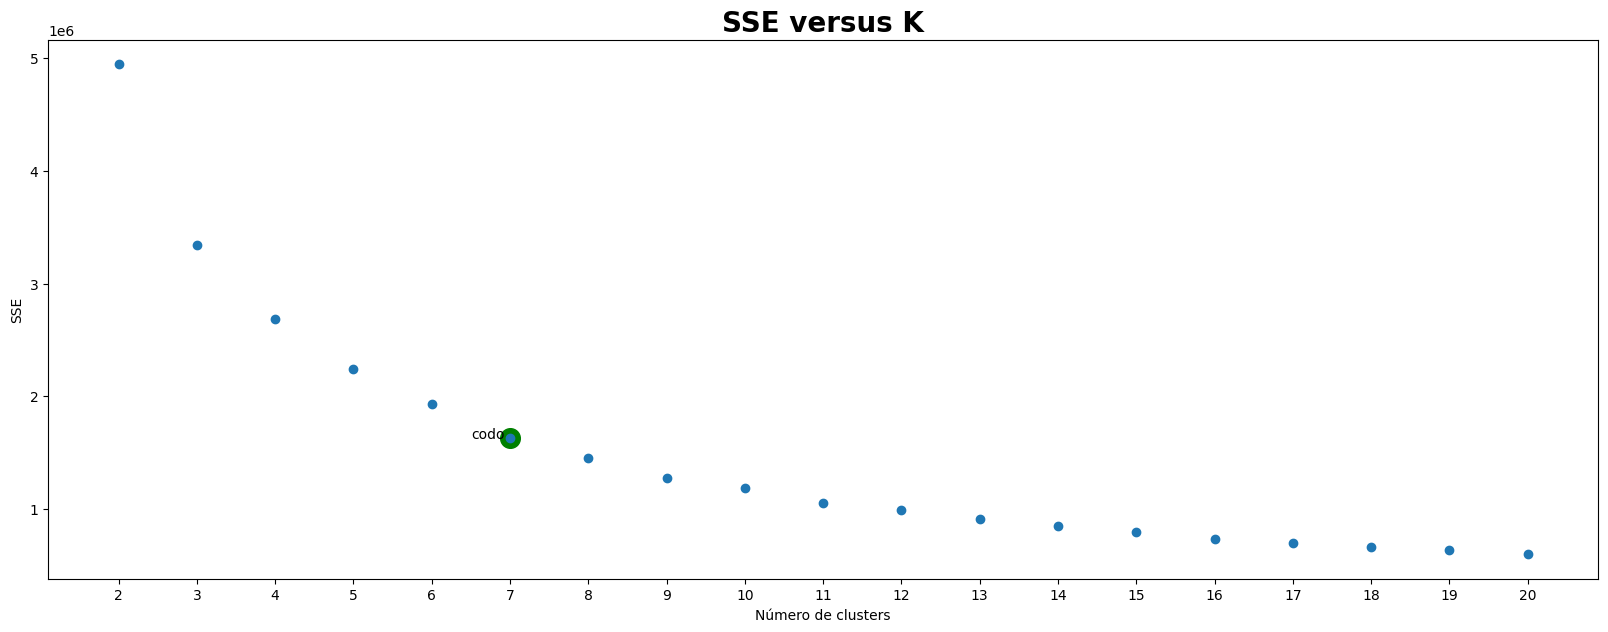

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(kl.elbow, sse[kl.elbow-2], color='green', s=200)
ax.text(kl.elbow-.5, sse[kl.elbow-2]-1000, s="codo")

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=kl.elbow, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[16.14858334  8.92734277]
 [35.2458192  20.58129855]
 [27.1944349  19.196977  ]
 [29.22282138 12.34036162]
 [13.47363252  2.17968973]
 [21.64002464 13.76457246]
 [21.7458449   6.51656105]]


In [ ]:
columnas_especificas = ["MaxTemp", "MinTemp"]
X = np.array(df[columnas_especificas])

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init="auto", random_state=29)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

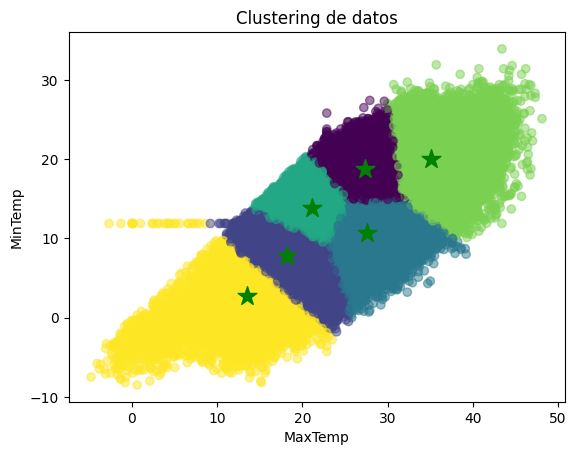

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='green', s=200)

plt.xlabel(columnas_especificas[0])
plt.ylabel(columnas_especificas[1])
plt.title('Clustering de datos')
plt.show()

### Observación de resultados - Modelo 7

En el contexto del análisis del modelo K-means para el clustering de datos de "MinTemp" y "MaxTemp", el gráfico de SSE versus K sugiere que el punto de codo se encuentra en
7
k=7. Esto indica que usar 7 clusters es una elección óptima para capturar la estructura subyacente de los datos sin sobreajustar el modelo. El gráfico de dispersión que muestra los datos agrupados junto con los centroides de los clusters, revela patrones significativos en las condiciones de tempertura mínima y temperatura máxima. Estos clusters permiten identificar diferentes combinaciones de temperatura, lo cual es crucial para la empresa. Con esta información, la empresa puede optimizar la planificación de cultivos y la gestión de recursos, anticipando mejor las necesidades de riego y las condiciones óptimas para la siembra y cosecha. Además, al reconocer estos patrones, se pueden tomar medidas preventivas más efectivas contra eventos climáticos adversos, protegiendo así los cultivos y mejorando la productividad agrícola.



Cluster 0: representa los días con temperaturas máximas moderadas y temperaturas mínimas bajas.

Centroides:
16.14858334
,
8.92734277
16.14858334,8.92734277


+ Cluster 1: representa los días con las temperaturas más altas tanto en MaxTemp como en MinTemp.


Centroides:
35.2458192
,
20.58129855
35.2458192,20.58129855


+ Cluster 2: agrupa los datos con temperaturas intermedias-altas en MaxTemp y MinTemp.


Centroides:
27.1944349
,
19.196977
27.1944349,19.196977


+ Cluster 3: agrupa los datos con temperaturas intermedias en MaxTemp y MinTemp.


Centroides:
29.22282138
,
12.34036162
29.22282138,12.34036162


+ Cluster 4: agrupa los datos con temperaturas mínimas bajas y temperaturas máximas moderadas.


Centroides:
13.47363252
,
2.17968973
13.47363252,2.17968973


+ Cluster 5: agrupa los datos con temperaturas intermedias, tanto en MaxTemp como en MinTemp.


Centroides:
21.64002464
,
13.76457246
21.64002464,13.76457246

+ Cluster 6: agrupa los datos con temperaturas mínimas bajas y temperaturas máximas moderadas.


Centroides:
21.7458449
,
6.51656105
21.7458449,6.51656105

#INSIGHTS DE ALTO IMPACTO

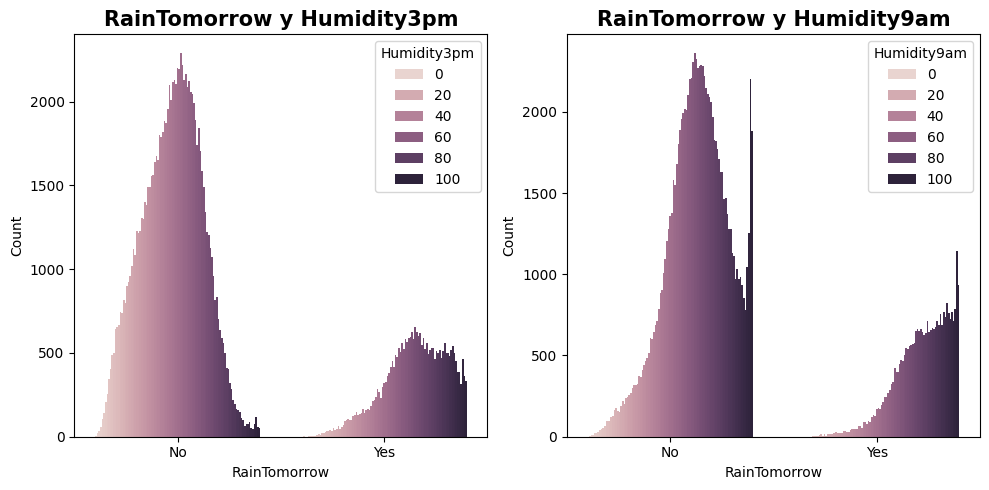

In [ ]:
selected_columns = ['RainTomorrow', 'Humidity9am', 'Humidity3pm']
plt.figure(figsize=(10, 5))

# Gráfico Humidity3pm
plt.subplot(1, 2, 1)
sns.countplot(x='RainTomorrow', hue='Humidity3pm', data=df_tratar)
plt.title("RainTomorrow y Humidity3pm", fontsize=15, fontweight="bold")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")
plt.ylabel("Count")

#Gráfico Humidity9am
plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', hue='Humidity9am', data=df_tratar)
plt.title("RainTomorrow y Humidity9am", fontsize=15, fontweight="bold")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

+ En ambos gráficos, los colores más oscuros representan niveles más altos de humedad.

+ Hay una correlación clara entre niveles más altos de humedad y la probabilidad de lluvia al día siguiente. Esto es más evidente en el gráfico de la derecha, donde los datos con alta humedad a las 9 AM se asocian más frecuentemente con "RainTomorrow" siendo "Yes".

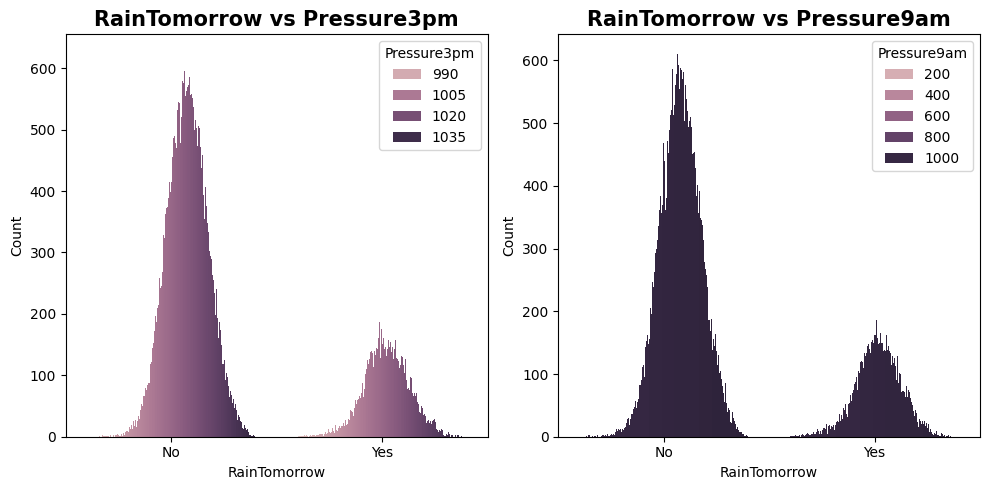

In [ ]:
selected_columns = ['RainTomorrow', 'Pressure9am', 'Pressure3pm']
plt.figure(figsize=(10, 5))

#Gráfico de Pressure3pm
plt.subplot(1, 2, 1)
sns.countplot(x='RainTomorrow', hue='Pressure3pm', data=df_tratar)
plt.title("RainTomorrow vs Pressure3pm", fontsize=15, fontweight="bold")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")

#Gráfico de  Pressure9am
plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', hue='Pressure9am', data=df_tratar)
plt.title("RainTomorrow vs Pressure9am", fontsize=15, fontweight="bold")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

En ambos gráficos, los colores más oscuros representan niveles más altos de presión atmosférica.

+ Relación con la Lluvia:
Hay una correlación clara entre niveles más bajos de presión y la probabilidad de lluvia al día siguiente. Esto es más evidente en ambos gráficos, donde los datos con baja presión atmosférica se asocian más frecuentemente con "RainTomorrow" siendo "Yes".


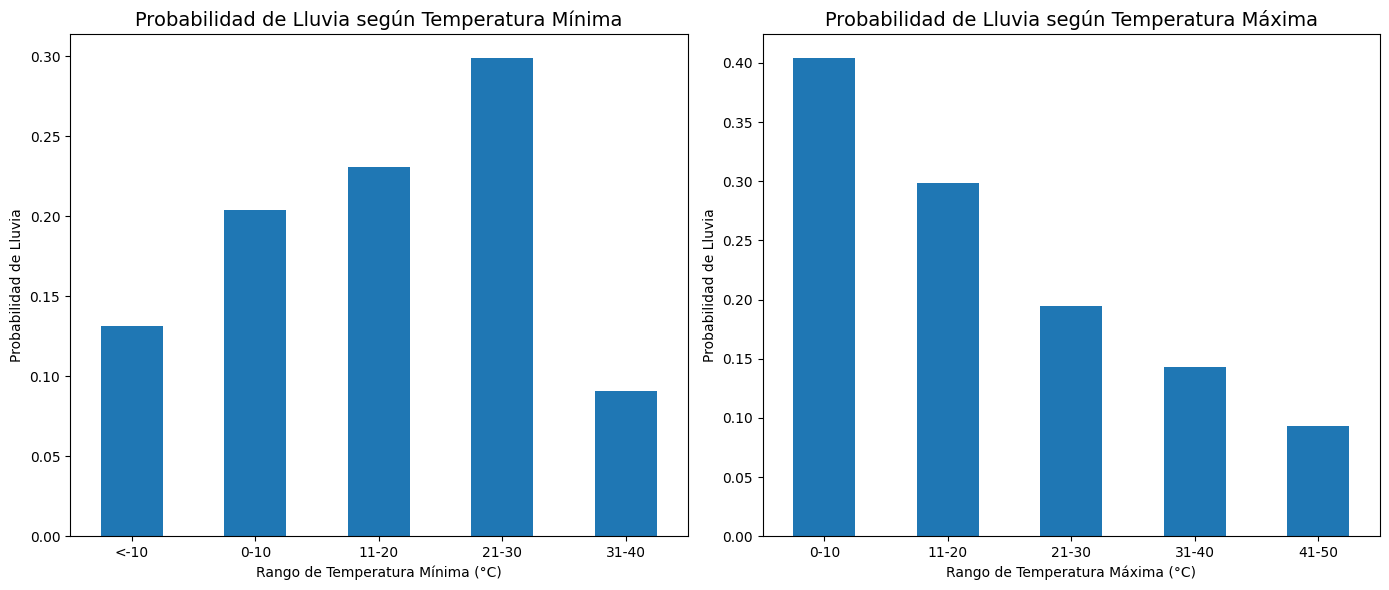

Probabilidad de lluvia según temperatura mínima:
 MinTemp_range
<-10     0.131719
0-10     0.203886
11-20    0.230521
21-30    0.298828
31-40    0.090909
Name: RainTomorrow, dtype: float64

Probabilidad de lluvia según temperatura máxima:
 MaxTemp_range
0-10     0.403889
11-20    0.298355
21-30    0.194419
31-40    0.142830
41-50    0.093126
Name: RainTomorrow, dtype: float64


In [ ]:
# Crea rangos de temperatura mínima
bins_min = [-10, 0, 10, 20, 30, 40]
labels_min = ['<-10', '0-10', '11-20', '21-30', '31-40']
df['MinTemp_range'] = pd.cut(df['MinTemp'], bins=bins_min, labels=labels_min, right=False)

# Crea rangos de temperatura máxima
bins_max = [0, 10, 20, 30, 40, 50]
labels_max = ['0-10', '11-20', '21-30', '31-40', '41-50']
df['MaxTemp_range'] = pd.cut(df['MaxTemp'], bins=bins_max, labels=labels_max, right=False)

# Calcula la probabilidad de lluvia para cada rango de temperatura mínima
prob_lluvia_min = df.groupby('MinTemp_range')['RainTomorrow'].mean()

# Calcula la probabilidad de lluvia para cada rango de temperatura máxima
prob_lluvia_max = df.groupby('MaxTemp_range')['RainTomorrow'].mean()

# Crea gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

prob_lluvia_min.plot(kind='bar', ax=axes[0])
axes[0].set_title('Probabilidad de Lluvia según Temperatura Mínima', fontsize=14)
axes[0].set_xlabel('Rango de Temperatura Mínima (°C)')
axes[0].set_ylabel('Probabilidad de Lluvia')
axes[0].tick_params(axis='x', rotation=0)

prob_lluvia_max.plot(kind='bar', ax=axes[1])
axes[1].set_title('Probabilidad de Lluvia según Temperatura Máxima', fontsize=14)
axes[1].set_xlabel('Rango de Temperatura Máxima (°C)')
axes[1].set_ylabel('Probabilidad de Lluvia')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Imprime los valores de probabilidad
print("Probabilidad de lluvia según temperatura mínima:\n", prob_lluvia_min)
print("\nProbabilidad de lluvia según temperatura máxima:\n", prob_lluvia_max)

Este análisis puede revelar si existe una relación entre las temperaturas extremas y la probabilidad de lluvia. Por ejemplo, podrías observar que la probabilidad de lluvia es mayor en días con temperaturas mínimas más altas o temperaturas máximas más bajas. Estos insights pueden ayudar a la empresa agrícola a entender cómo las temperaturas influyen en la probabilidad de lluvia y ajustar sus prácticas agrícolas en consecuencia.

+ Temperatura mínima:

A mayor temperatura mínima, mayor probabilidad de lluvia (hasta cierto punto): La probabilidad de lluvia aumenta a medida que la temperatura mínima sube, desde un 13% para temperaturas menores a -10°C hasta casi un 30% para temperaturas entre 21-30°C.
Disminución en temperaturas muy altas: Sin embargo, la probabilidad de lluvia disminuye notablemente para temperaturas mínimas superiores a 30°C (15%). Esto podría indicar que, aunque el calor es un factor para la formación de lluvia, temperaturas mínimas extremadamente altas podrían estar asociadas a otros patrones climáticos que inhiben la precipitación.

+ Temperatura máxima:

A menor temperatura máxima, mayor probabilidad de lluvia: La probabilidad de lluvia es significativamente mayor en días con temperaturas máximas bajas. Un 40% de probabilidad de lluvia con máximas entre 0-10°C, disminuyendo gradualmente hasta un 9% con máximas entre 41-50°C.
Frío como posible indicador de lluvia: Esto sugiere que los días más fríos, con temperaturas máximas bajas, tienden a estar asociados con sistemas climáticos que favorecen la precipitación.

#FASE 5 - EVALUACIÓN

#(CADA EVALUACION SE ENCUENTRA EN EL APARTADO DE CADA MODELO DE LA FASE ANTERIOR)

Aquí se presentan evaluaciones para realizar predicciones extras que aporten al modelo de negocio


En esta etapa crítica, pondremos a prueba la eficacia de los modelos construidos. Utilizando métricas y criterios definidos previamente, evaluaremos en qué medida nuestros modelos cumplen con los objetivos del negocio. Identificaremos posibles áreas de mejora y ajuste.

#FASE 6 - DESPLIEGUE

Una vez que hemos confirmado la validez y utilidad de nuestros modelos, es el momento de llevarlos a la práctica. Aquí, nos enfocaremos en organizar y presentar la información de manera que sea comprensible y útil para los usuarios finales. Planificaremos la implementación final, asegurándonos de que los modelos matemáticos se integren de manera efectiva en las operaciones comerciales.

Además, estaremos atentos para aprender de este proceso, evaluando el éxito o fracaso del proyecto y utilizando esas lecciones para informar futuras iniciativas. Esta fase marca el final de un ciclo, pero también el comienzo de nuevas oportunidades para aplicar el aprendizaje obtenido.

#PANEL DE CONTROL ENTRE MODELOS LINEAL REGRESSION Y TREE REGRESSION

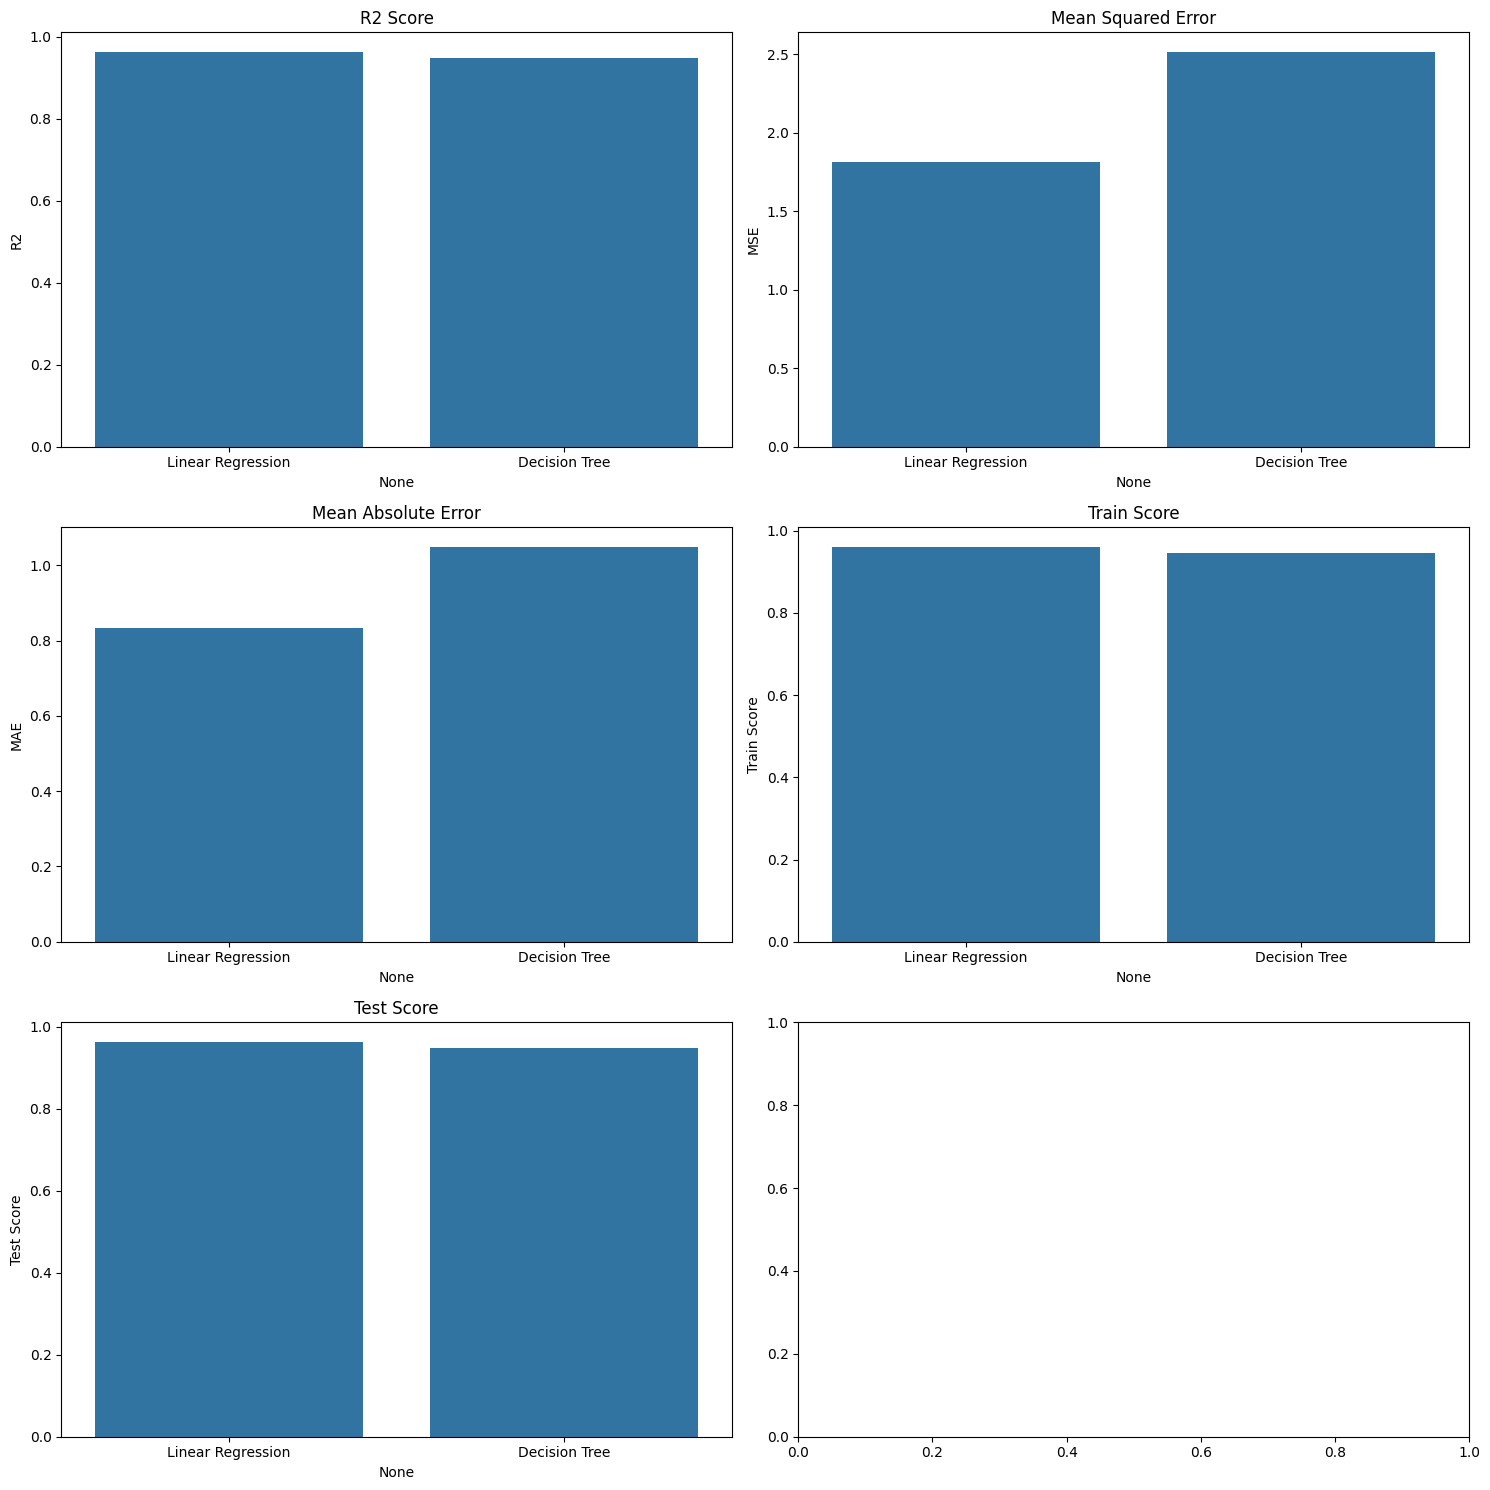

In [ ]:
X = df[['MinTempAyer', 'Temp3pmAyer', 'Temp9amAyer']]
y = df['MaxTemp']

# Entrenamiento y evaluación del modelo de Regresión Lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

# Entrenamiento y evaluación del modelo de Árbol de Decisión
modelo_tree = DecisionTreeRegressor(max_depth=4, random_state=29)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)

# Cálculo de métricas
metrics = {
    "Linear Regression": {
        "R2": r2_score(y_test, y_pred_lineal),
        "MSE": mean_squared_error(y_test, y_pred_lineal),
        "MAE": mean_absolute_error(y_test, y_pred_lineal),
        "Train Score": modelo_lineal.score(X_train, y_train),
        "Test Score": modelo_lineal.score(X_test, y_test)
    },
    "Decision Tree": {
        "R2": r2_score(y_test, y_pred_tree),
        "MSE": mean_squared_error(y_test, y_pred_tree),
        "MAE": mean_absolute_error(y_test, y_pred_tree),
        "Train Score": modelo_tree.score(X_train, y_train),
        "Test Score": modelo_tree.score(X_test, y_test)
    }
}

# Convertir las métricas a un DataFrame
metrics_df = pd.DataFrame(metrics).T

# Crear las visualizaciones
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot R2 Score
sns.barplot(x=metrics_df.index, y='R2', data=metrics_df.reset_index(), ax=axes[0, 0])
axes[0, 0].set_title('R2 Score')

# Plot Mean Squared Error
sns.barplot(x=metrics_df.index, y='MSE', data=metrics_df.reset_index(), ax=axes[0, 1])
axes[0, 1].set_title('Mean Squared Error')

# Plot Mean Absolute Error
sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df.reset_index(), ax=axes[1, 0])
axes[1, 0].set_title('Mean Absolute Error')

# Plot Train Score
sns.barplot(x=metrics_df.index, y='Train Score', data=metrics_df.reset_index(), ax=axes[1, 1])
axes[1, 1].set_title('Train Score')

# Plot Test Score
sns.barplot(x=metrics_df.index, y='Test Score', data=metrics_df.reset_index(), ax=axes[2, 0])
axes[2, 0].set_title('Test Score')

# Ajustar el layout
plt.tight_layout()
plt.show()

Para elegir el mejor modelo entre la regresión lineal y el árbol de decisión, debemos considerar varias métricas clave

R2 Score:

+ La regresión lineal y el árbol de decisión tienen valores de R2 muy similares. Ambos parecen estar cerca de 0.9, lo que indica que ambos modelos explican bien la variabilidad de los datos.

+ La regresión lineal tiene un MSE más bajo que el árbol de decisión. Esto sugiere que la regresión lineal comete errores menores en promedio al predecir los valores de salida.

Mean Absolute Error (MAE):

+ Similar al MSE, la regresión lineal tiene un MAE más bajo que el árbol de decisión. Esto indica que los errores absolutos en las predicciones de la regresión lineal son menores en promedio.
Train Score:

Ambos modelos tienen puntajes de entrenamiento muy similares y altos, lo que indica que ambos modelos ajustan bien los datos de entrenamiento.
Test Score:

Al igual que el Train Score, ambos modelos tienen puntajes de prueba similares y altos, lo que indica que ambos modelos generalizan bien los datos de prueba.

Por lo tanto, basándonos en las métricas proporcionadas, elegimos la **REGRESION LINEAL** como el mejor modelo.

##Estrategias de despliegue en relación a nuestro caso de negocio Agrícola con los diferentes modelos

Estrategias Basadas en Modelos Supervisados
(Regresión Lineal y Árbol de Decisión)

Predicción de Temperaturas Máximas:

+ Utilizar las predicciones de temperatura para planificar mejor las actividades agrícolas, como el riego, la fumigación y la cosecha.

+ Reducir el riesgo de pérdida de cultivos debido a condiciones climáticas adversas y optimizar el uso de recursos.

Integración y Implementación

Sistema de Gestión Agrícola Basado en IA:

+ Desarrollar una plataforma integrada que utilice los modelos para proporcionar recomendaciones y alertas a los agricultores.
+ Mejora en la toma de decisiones y aumento de la eficiencia operativa.
